<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime  # для получения дня недели из даты
pd.options.mode.chained_assignment = None  # отключаем предупреждения Pandas

In [2]:
test = [1, 2, 3, 4]
intervals = pd.cut(test, 2, include_lowest=True, right=False)

In [3]:
intervals

[[1.0, 2.5), [1.0, 2.5), [2.5, 4.003), [2.5, 4.003)]
Categories (2, interval[float64]): [[1.0, 2.5) < [2.5, 4.003)]

In [4]:
aparts = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Работаем с файлом дальше:

In [5]:
aparts.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


На первый взгляд, очень много NaN в таблице. Будем смотреть.

Выведем общую информацию о датафрейме:

In [6]:
aparts.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В целом, данные выглядят нормально. Правда, есть 100метровые потолки и 19комнатные квартиры. Будем смотреть.

Посмотрим пропуски:

In [7]:
aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

И правда так - NaN просто огромное количество. Посмотрим сколько же.

Выведем информацию о NaN по каждому из столбцов (процент содержания NaN в каждом столбце относительно общего количества строк):
Heatmap по NaN
sns.set(rc={'figure.figsize':(19.7,8.27)})

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

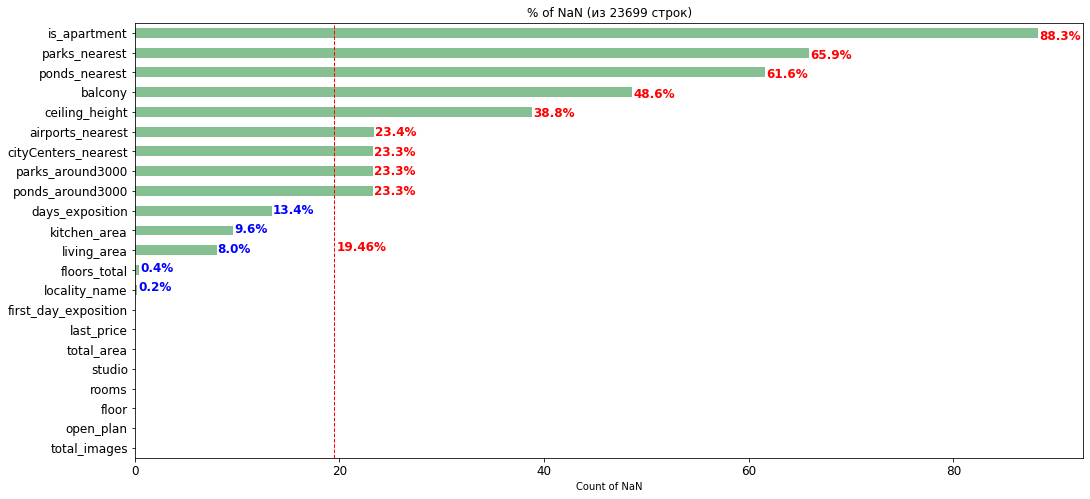

In [8]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(1)
    threshold = percent_of_nulls.mean()
    # above_threshold = np.maximum(percent_of_nulls - threshold, 0)
    # below_threshold = np.minimum(percent_of_nulls, threshold)
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (из 23699 строк)', 
                               color='#86bf91', legend=False, fontsize=12)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    return ax, threshold

plot, threshold = percent_hbar(aparts)

Выглядит ужасающе. На графике отображен средний процент содержания NaN в столбце - равен почти 20%. И этот порог преодолели 9 столбцов (из 22). Посмотрим, что можно сделать.

Мы видим, что есть 5 столбцов, где процент содержания NaN крайне велик (от 39% и до 88%).
Назову их и пока предположу решение:

- могу предположить, что "нет данных" там, где ответ - "0", т.е. это не апартаменты. Причиной может быть следующее: не многие люди (в том числе и я ранее) особо не знали разницы между апартаментами и квартирами, это вело к тому, что люди, которые продавали квартиры, при заполнении формы для создания объявления просто пропускали эти пункты, т.к. особо не понимали, что их спрашивали. И наоборот, владельцы апартаментов точно в курсе, что у них апартаменты (раз уж они их приобрели, значит, они разбираются в этом вопросе), поэтому по ним данные оказались заполненными. Взглянм на то, какие значения присутствуют, и примем решения по вопросу заполнения пропусков;
- вполне возможно, что данные просто не были выгружены системой. Беря в расчет то, что это далеко не самые важные параметры, и отсутствие возможности проставить какое-либо адекватные расстояние, которое не испортит статистику по уже присутствующим данным по этим столбцам, предлагаю здесь не трогать пропуски, учитывая, что есть достаточное количество строк, где данные присутствуют, и по ним можно сделать срез и заметить определенные тенденции;
balcony - вполне возможно, что где балкон отсутствует, там вместо 0 стоит NaN. Необходимо проверить, действительно ли по столбцу balcony присутствует только значение "1", говорящее, что балкон есть, а "0" - отсутствует;
ceiling_height - довольно важная информация, но она отсуствует. Предполагаю, что некоторые не считают это обязательным для заполнения пунктом и поэтому не предприняли никаких действий для того, чтоб узнать высоту своих потолков, иначе бы данные присутствовали. Будем смотреть, как можно заполнить. Вполне возможно, это будет средний показатель ceiling_height по населенному пункту.
- довольно важный параметр. Информация может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе. По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет. Тем не менее, проставлять информацию о сроках продажи наугад не стоит. Здесь "среднее"/"медиана" не подойдут. Можно было бы посмотреть, как продавались квартиры с теми же параметрами, но кто знает, может, в какой-то из квартир трубы текут и воняет, что может сильно влиять на конечный срок продажи, а этих данных в таблице уже нет. Поэтому оставляем этот столбец в покое.

Предложение по остальным столбцам с NaN:

airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000:
По : данные рассчитывала система. Они могут отустствовать по причине того, что относительно конкретно взятого населенного пункта/точки искались расстояние в определенном радиусе. Если в пределах этого радиуса ни аэропорта, ни парков не было, то и указать в этом столбце системе было нечего. Как бы то ни было, где указаны названия населенных пунктов (кроме СПб, т.к. это крупный город), найдем их координаты и посчитаем вручную расстояние между ними и аэропортом и центром СПб;
По parks_around3000, ponds_around3000: аналогично как и с parks_nearest и ponds_nearest - данные просто не были заполнены. Пропуски в них не трогаем;
- довольно важный параметр. Информация может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже, т.е., фактически, сделка была совершена, но не была закрыта на онлайн-ресурсе. По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет;
- данные, которые могут быть не заполнены просто по той причине, что они необязательны к заполнению, а высчитывать жилую площадь/площадь кухни продавцам некогда. Также выясним, нет ли такой связи, что если квартира - студия, то там отсутствуют эти данные. Ведь в них нет явного деления площади на ту, которая относится к кухне, и ту, которая относится к жилой площади;
- данные могут отсутствать по причине необязательности заполнения этих столбцов. Учитывая, что вариативность этажности в зданий довольно сильно коррелирует с местонахождением здания (например, в центре СПб здания сильно ниже, чем на окраине города), заполним эти данные в соответствии с этой логикой;
- выглядит довольно странно, когда не указывают населенный пункт. Предположу, что свойственно это тем продавцам, которые уверены, что всем очевидно, что если они выставляют квартиру на продажу в разделе сайта "Санкт-Петербург", то и квартира в Санкт-Петербурге, не подозревая даже, что это может быть и Лен. область. Тем не менее, заполним данные только по тем строкам, где указано расстояние до центра. От центра до окраин города в среднем 17 км расстояния, те квартиры, которые находятся в пределах 17 км от центра, получат "Санкт-Петерубург" вместо пропусков.

### Вывод

Данные довольно "грязные", но будем искать пути решения для их максимально корректного заполнения.

## Предобработка данных

Заполняем пропуски. Идем по порядку:

is_apartment

In [9]:
print('Количество NaN в столбце is_apartment:', aparts['is_apartment'].isnull().sum())
aparts['is_apartment'].value_counts()

Количество NaN в столбце is_apartment: 20924


False    2725
True       50
Name: is_apartment, dtype: int64

Видим, что присутствуют оба значения. Тем не менее, заполнять пропуски значением False не будем, т.к. если мы это сделаем, то мы скажем, что во всём датафрейме (>20000 строк) всего 50 апартаментов, что, на мой взгляд, не может соотноситься с реальностью.

parks_nearest, ponds_nearest (парки, водоемы в радиусе 3км) и сразу же parks_around3000, ponds_around3000.
Как и писал выше, не трогаем их.

Лог замечаний по этому пункту:



balcony - где данные отсутствуют, проставим нули - балкон отсутствует.

In [10]:
aparts['balcony'] = aparts['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', aparts['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


In [11]:
aparts['ceiling_height'].isnull().sum()

9195

Категоризируем все строки по удаленности от центра (где это возможно) и возьмем среднее по высоте потолков там, чтоб заполнить пропуски.


Градировать будем так:

0-2км от центра (категория 'самый центр');
2-5км от центра (категория 'центр');
5-17км от центра (категория 'близко');
>17км от центра (категория 'пгт').
Так выглядит логично: 0-2,5 км - квартира у Дворцовой, 2-5 км - квартира на ВО, 5-17км - квартира на Парнасе или в Купчино. > 17км - за КАДом.

Напишем под это функцию:

In [12]:
def fillna_ceiling_height(row):
    if row['cityCenters_nearest'] < 2500:
        return 'самый центр'
    elif row['cityCenters_nearest'] < 5000:
        return 'центр'
    elif row['cityCenters_nearest'] < 17000:
        return 'в пределах города'
    elif row['cityCenters_nearest'] >= 17000:
        return 'область'

Применяем её:

In [13]:
aparts['fromcenter_category'] = aparts.apply(fillna_ceiling_height, axis=1)

Смотрим на результат:

In [14]:
aparts[['locality_name', 'cityCenters_nearest', 'fromcenter_category']].head(10)

,locality_name,cityCenters_nearest,fromcenter_category
0,Санкт-Петербург,16028.0,в пределах города
1,посёлок Шушары,18603.0,область
2,Санкт-Петербург,13933.0,в пределах города
3,Санкт-Петербург,6800.0,в пределах города
4,Санкт-Петербург,8098.0,в пределах города
5,городской посёлок Янино-1,NaN,None
6,посёлок Парголово,19143.0,область
7,Санкт-Петербург,11634.0,в пределах города
8,посёлок Мурино,NaN,None
9,Санкт-Петербург,15008.0,в пределах города



Заполним пропуски в столбце ceiling_height средним по каждой группе fromcenter_category (кроме строк, где NaN в cityCenters_nearest - там мы не можем узнать, центр это или, например, почти область, поэтому не будем трогать):

In [15]:
aparts.groupby('fromcenter_category')['ceiling_height'].mean().sort_values(ascending=False).to_frame()

,ceiling_height
fromcenter_category,
самый центр,3.239759
центр,3.189076
в пределах города,2.744391
область,2.677288


In [16]:
list_of_fromcenter_cat = ['самый центр', 'центр', 'близко к центру', 'ближе к области/область']
for column in list_of_fromcenter_cat:
    value_for_filling = aparts.groupby('fromcenter_category')['ceiling_height'].mean().get(key=column)
    aparts['ceiling_height'] = aparts.groupby('fromcenter_category')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))

In [17]:
aparts['ceiling_height'] = aparts.groupby('fromcenter_category')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))

Смотрим, как применилось:

In [18]:
aparts.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.00,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в пределах города
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.677288,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.744391,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.744391,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.00,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,None
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.677288,26.0,10.60,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,область
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.744391,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,в пределах города
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,None
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9.0,43.60,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,в пределах города


In [19]:
print('Количество NaN по days_exposition:', aparts['days_exposition'].isnull().sum())

Количество NaN по days_exposition: 3181


Количество NaN по days_exposition: 3181
Как писал выше, довольно важный параметр. Но "среднее"/"медиана" не подойдут. Поэтому оставляем этот столбец в покое.

kitchen_area, living_area - будем смотреть, важные параметры для расчета дальнейших "собирательных" данных.

In [20]:
print('Количество NaN по kitchen_area:', aparts['kitchen_area'].isnull().sum())
print('Количество NaN по living_area:', aparts['living_area'].isnull().sum())

Количество NaN по kitchen_area: 2278
Количество NaN по living_area: 1903


Количество NaN по kitchen_area: 2278
Количество NaN по living_area: 1903
Данные важны, но проставлять среднее было бы некорректно. И в Колпино может быть изба на 2000 квадратов или квартира 50 кв.м., из которых 45 - кухня.

Рассмотрим теорию, что именно по студиям не указана эта информация:

In [21]:
aparts.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    197
living_area      14
dtype: int64


Лишь малая часть пропусков по этим столбцам относится к студиям. Да и с ними нам нечего делать - не делить же пополам общую площадь. Оставляем как есть.


floors_total - ещё раз посмотрим количество пропусков и примем решение об их заполнении средним по группам по удаленности от центра:

In [22]:
print('Количество NaN по floors_total:', aparts['floors_total'].isnull().sum())

Количество NaN по floors_total: 86


Количество NaN по floors_total: 86
Заполняем пропуски:

In [23]:
list_of_fromcenter_cat = ['самый центр', 'центр', 'близко к центру', 'ближе к области/область']
for column in list_of_fromcenter_cat:
    value_for_filling = aparts.groupby('fromcenter_category')['floors_total'].mean().get(key=column)
    aparts['floors_total'] = aparts.groupby('fromcenter_category')['floors_total'].apply(lambda x: x.fillna(x.mean()))

In [24]:
aparts.query('floors_total.isnull()')[['floors_total', 'locality_name', 'fromcenter_category', 'cityCenters_nearest']].head(10)

,floors_total,locality_name,fromcenter_category,cityCenters_nearest
5,NaN,городской посёлок Янино-1,None,NaN
8,NaN,посёлок Мурино,None,NaN
12,NaN,Сертолово,None,NaN
22,NaN,деревня Кудрово,None,NaN
30,NaN,Коммунар,None,NaN
37,NaN,поселок городского типа Красный Бор,None,NaN
38,NaN,посёлок Мурино,None,NaN
47,NaN,Гатчина,None,NaN
60,NaN,посёлок Мурино,None,NaN
62,NaN,Сертолово,None,NaN


Это те строки, где отсутствует значение удаленности от центра и нам не удалось его рассчитать по координатам, т.к. название населенного или отутствует, или это Санкт-Петербург. Оставляем эти пропуски, с ними нам ничего не сделать.

И, наконец, locality_name: проверим, есть ли данные по расстоянию от центра города, чтоб хотя бы предположить, что эта квартира находится в пределах Санкт-Петербурга:

In [25]:
print('Количество NaN по locality_name:', aparts['locality_name'].isnull().sum())
aparts[(aparts['locality_name'].isnull())][['locality_name', 'cityCenters_nearest']].head()

Количество NaN по locality_name: 49


,locality_name,cityCenters_nearest
1097,NaN,4258.0
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0


Количество NaN по locality_name: 49

Это, фактически, ура. Мы видим, что в части строк, где не указан город, есть информация по расстоянию от центра. Как и выше брали при категоризации по удаленности от центра, возьмем за основу, что < 17 км от центра - это город, > 17 км - область. Т.к. "область" мы проставить не можем, оставим там NaN, а где расстояние будет < 10 км, там проставим "Санкт-Петербург".

Производим эту замену:

In [26]:

aparts.loc[(aparts['locality_name'].isnull()) & (aparts['cityCenters_nearest'] < 10000), 'locality_name'] = aparts.loc[(aparts['locality_name'].isnull()) & (aparts['cityCenters_nearest'] < 10000), 'locality_name'].fillna('Санкт-Петербург')

Проверяем, сократилось ли количество NaN в столбце:

In [27]:
print('Количество NaN по locality_name:', aparts['locality_name'].isnull().sum())

Количество NaN по locality_name: 24


Количество NaN по locality_name: 24
Да, было 49, стало 24. По 25 заполнили пропуски.

Обновим данные по пропускам:

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdb667a4990>, 17.830434782608698)

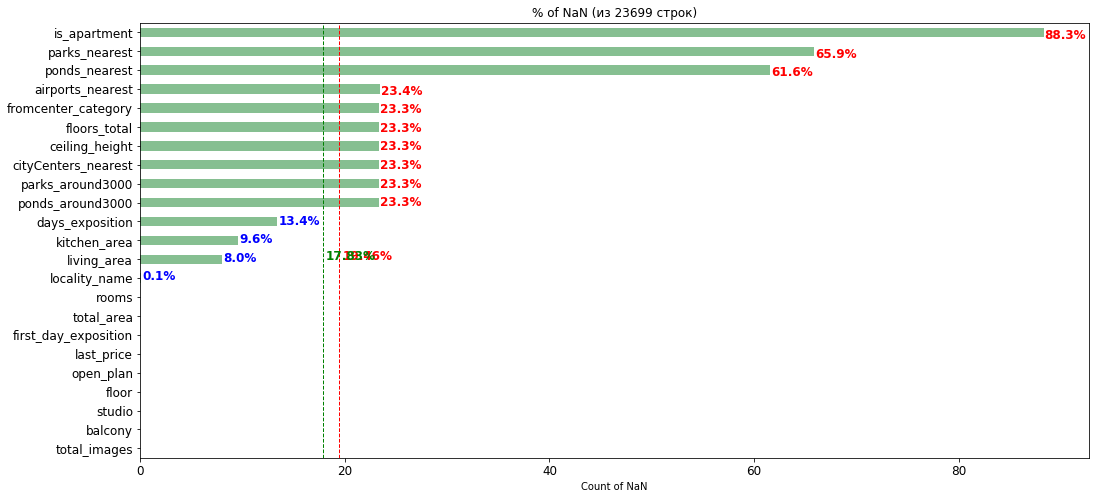

In [28]:
percent_hbar(aparts, threshold)


С is_apartment лучше не стало, по другим столбцам ситуация с пропусками улучшилась. Такая неважная характеристика данных, как средний процент NaN в столбцах уменьшилась почти на 7%.


2.2. Теперь займемся изменением типа данных по столбцам:

In [29]:
aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          18180 non-null float64
floors_total            18180 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23675 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [30]:
aparts.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в пределах города
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.677288,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.744391,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.744391,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,в пределах города
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,в пределах города



К изменению:
last_price - в целочисленный тип (нам не нужны копейки в цене);
total_area - округлим до 1го знака после запятой (всё-таки это квадратные метры, можно и за десятые побороться);
first_day_exposition - даты в datetime;
ceiling_height - округлим до 1го знака после запятой (всё-таки это высота потолков, можно и за десятые побороться);
floors_total, balcony - ну где вы видели нецелочисленное количество этажей? На int;
living_area, kitchen_area - туда же к иcтории про площадь и высоту потолков, т.е. до 1 знака после запятой
airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - все расстояния указаны в метрах, переводим в целочисленный формат
days_exposition - количество дней, как долго продавалась недвижимость. Естественно, в int.
Буду двигаться в таком порядке:

Изменяю формат столбца first_day_exposition на datetime, т.к. нам из этого столбца необходимо добавлять новые столбцы из Шага 3.
Добавляю новые столбцы из Шага 3 (цена кв.м.; год, месяц, день недели публикации объявления, категории по этажам (первый, последний, другой), сотношение жилой площади и площади кухни с общей площадью).
Меняю тип данных для всех остальных столбцов, где это необходимо.
Почему в таком порядке? Чтобы по 2 раза не заниматься изменением данных: сначала в столбцах начальной таблицы, а потом во вновь сформированных.

1. Изменяю формат столбца first_day_exposition на datetime:

In [31]:
aparts['first_day_exposition'] = pd.to_datetime(aparts['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


2. Добавление новых столбцов (Шаг 3 в оригинальном списке задач):

Посчитаем и добавим цену квадратного метра:

In [32]:
aparts['price_of_m2'] = aparts['last_price']/aparts['total_area']

Добавим год, месяц публикации объявления:

In [33]:
aparts['year'] = aparts['first_day_exposition'].apply(lambda x: x.year)
aparts['month'] = aparts['first_day_exposition'].apply(lambda x: x.month)

Добавим день недели публикации объявления:
Сначала проставим день недели в формате числа (1 - понедельник, 7 - воскресенье):

In [34]:
aparts['day'] = aparts['first_day_exposition'].apply(lambda x: x.isoweekday())


Теперь создадим словарь, чтобы изменить значение с чисел на текст (напр., 'суббота'):

In [35]:
dict_of_weekdays = {1: '1 - понедельник', 2: '2 - вторник', 3: '3 - среда', 4: '4 - четверг', 
                    5: '5 - пятница', 6: '6 - суббота', 7: '7 - воскресенье'}


Меняем значения:

In [36]:
aparts['day'] = aparts['day'].map(dict_of_weekdays)

Добавим категорию по этажам (варианты — 'первый', 'последний', 'другой'):

In [37]:
aparts['level'] = np.where(aparts['floor'] == 1, 'первый', 'другой')
aparts['level'] = np.where(aparts['floor'] == aparts['floors_total'], 'последний', aparts['level'])

Добавим столбцы с соотношением жилой и общей площади, а также с отношением площади кухни к общей:

In [38]:
aparts['living_area_part'] = aparts['living_area']/aparts['total_area']
aparts['kitchen_area_part'] = aparts['kitchen_area']/aparts['total_area']

Займемся изменением типов данных.
1.'last_price'	1.'total_area'	1.'living_area_part'
2.'floors_total'	2.'ceiling_height'	2.'kitchen_area_part'
3.'balcony'	3.'living_area'
4.'airports_nearest'	4.'kitchen_area'
5.'cityCenters_nearest'	 
6.'parks_around3000'	 
7.'parks_nearest'	 
8.'ponds_around3000'	 
9.'ponds_nearest'	 
10.'days_exposition'	 
11.'price_of_m2'	 
Список столбцов для приведения к типу int:

In [39]:
list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_of_m2']

Изменяем на тип int (в черновом варианте удалял при этом trailing zeros (используя форматирование через '{0:g}', но потом отказался от этого в пользу сохранения числового типа столбца, а не получения его в object):

In [40]:
for column in list_to_int:
    aparts[column] = aparts[aparts[column].notnull()][column].astype('int')


Столбцы, где округляем данные до 1 знака после запятой:

In [41]:
list_to_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

Округляем до 1 знака после запятой:

In [42]:
for column in list_to_float_1:
    aparts[column] = aparts[aparts[column].notnull()][column].round(1)


Столбцы, где округляем данные до 2 знаков после запятой:

In [43]:
list_to_float_1 = ['living_area_part', 'kitchen_area_part']


Округляем до 2 знаков после запятой:

In [44]:
for column in list_to_float_1:
    aparts[column] = aparts[aparts[column].notnull()][column].round(2)


Проверяем, что получилось:

In [45]:
aparts.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,fromcenter_category,price_of_m2,year,month,day,level,living_area_part,kitchen_area_part
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,755.0,NaN,в пределах города,120370,2019,3,4 - четверг,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.6,1,NaN,...,NaN,81.0,область,82920,2018,12,2 - вторник,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.7,5.0,34.3,4,NaN,...,574.0,558.0,в пределах города,92785,2015,8,4 - четверг,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.7,14.0,NaN,9,NaN,...,234.0,424.0,в пределах города,408176,2015,7,5 - пятница,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,48.0,121.0,в пределах города,100000,2018,6,2 - вторник,другой,0.32,0.41
5,10,2890000,30.4,2018-09-10,1,NaN,NaN,14.4,5,NaN,...,NaN,55.0,None,95065,2018,9,1 - понедельник,другой,0.47,0.30
6,6,3700000,37.3,2017-11-02,1,2.7,26.0,10.6,6,NaN,...,NaN,155.0,область,99195,2017,11,4 - четверг,другой,0.28,0.39
7,5,7915000,71.6,2019-04-18,2,2.7,24.0,NaN,22,NaN,...,NaN,NaN,в пределах города,110544,2019,4,4 - четверг,другой,NaN,0.26
8,20,2900000,33.2,2018-05-23,1,NaN,NaN,15.4,26,NaN,...,NaN,189.0,None,87454,2018,5,3 - среда,другой,0.47,0.27
9,18,5400000,61.0,2017-02-26,3,2.5,9.0,43.6,7,NaN,...,NaN,289.0,в пределах города,88524,2017,2,7 - воскресенье,другой,0.71,0.11


In [46]:
aparts.level.value_counts()

другой       18451
первый        2911
последний     2337
Name: level, dtype: int64


Столбец last_price приведем к тысячам (к миллионам - нет желания иметь 3 знака после запятой "на всякий случай"), а то слишком много нулей. Ну и, соответственно, тоже самое проделаем для price_of_m2, только там оставим 3 знака после запятой.

In [47]:
aparts['last_price'] = (aparts[aparts['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)
aparts['price_of_m2'] = (aparts[aparts['price_of_m2'].notnull()]['price_of_m2']/1000*1.0).round(3)
aparts.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,fromcenter_category,price_of_m2,year,month,day,level,living_area_part,kitchen_area_part
0,20,13000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,755.0,NaN,в пределах города,120.370,2019,3,4 - четверг,другой,0.47,0.23
1,7,3350,40.4,2018-12-04,1,2.7,11.0,18.6,1,NaN,...,NaN,81.0,область,82.920,2018,12,2 - вторник,первый,0.46,0.27
2,10,5196,56.0,2015-08-20,2,2.7,5.0,34.3,4,NaN,...,574.0,558.0,в пределах города,92.785,2015,8,4 - четверг,другой,0.61,0.15
3,0,64900,159.0,2015-07-24,3,2.7,14.0,NaN,9,NaN,...,234.0,424.0,в пределах города,408.176,2015,7,5 - пятница,другой,NaN,NaN
4,2,10000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,48.0,121.0,в пределах города,100.000,2018,6,2 - вторник,другой,0.32,0.41


## Расчёты и добавление результатов в таблицу

1.1. Изучаем следующие параметры: площадь, цена, число комнат, высота потолков.

In [48]:
aparts[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,18180.000000
mean,60.348635,6541.548800,2.070636,2.776397
std,35.654086,10887.012837,1.078405,0.988544
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.700000
75%,69.900000,6800.000000,3.000000,2.800000
max,900.000000,763000.000000,19.000000,100.000000


Предварительный анализ дал следующее:

по площади есть как квартира 12 кв.м., так и 900 кв.м. Но среднее значение выглядит более здравым;
по цене за квартиру - есть варианты и за 12 тысяч рублей, есть за 763 млн, любой покупатель найдет свой вариант;
число комнат - от 0 (студия) до 19. Возможно, это общежития или нежилые помещения;
высота потолков - от 1 до 100 метров.
Всё как надо. Продолжаем.

Узнаем количество строк датафрейма aparts для того, чтоб указать выборку при прорисовке статистических графиков:

In [49]:
print('Выборка квартир в центральной зоне Санкт-Петербурга -', aparts.shape[0], 'квартир')

Выборка квартир в центральной зоне Санкт-Петербурга - 23699 квартир


Выборка квартир в центральной зоне Санкт-Петербурга - 23699 квартир
1.2. Нарисуем гистограммы (и одну круговую диаграмму для получения распределению по количеству комнат) их распределения:

Для начала определим выбросы по каждому из набора данных (что лежит за пределами "усов"):

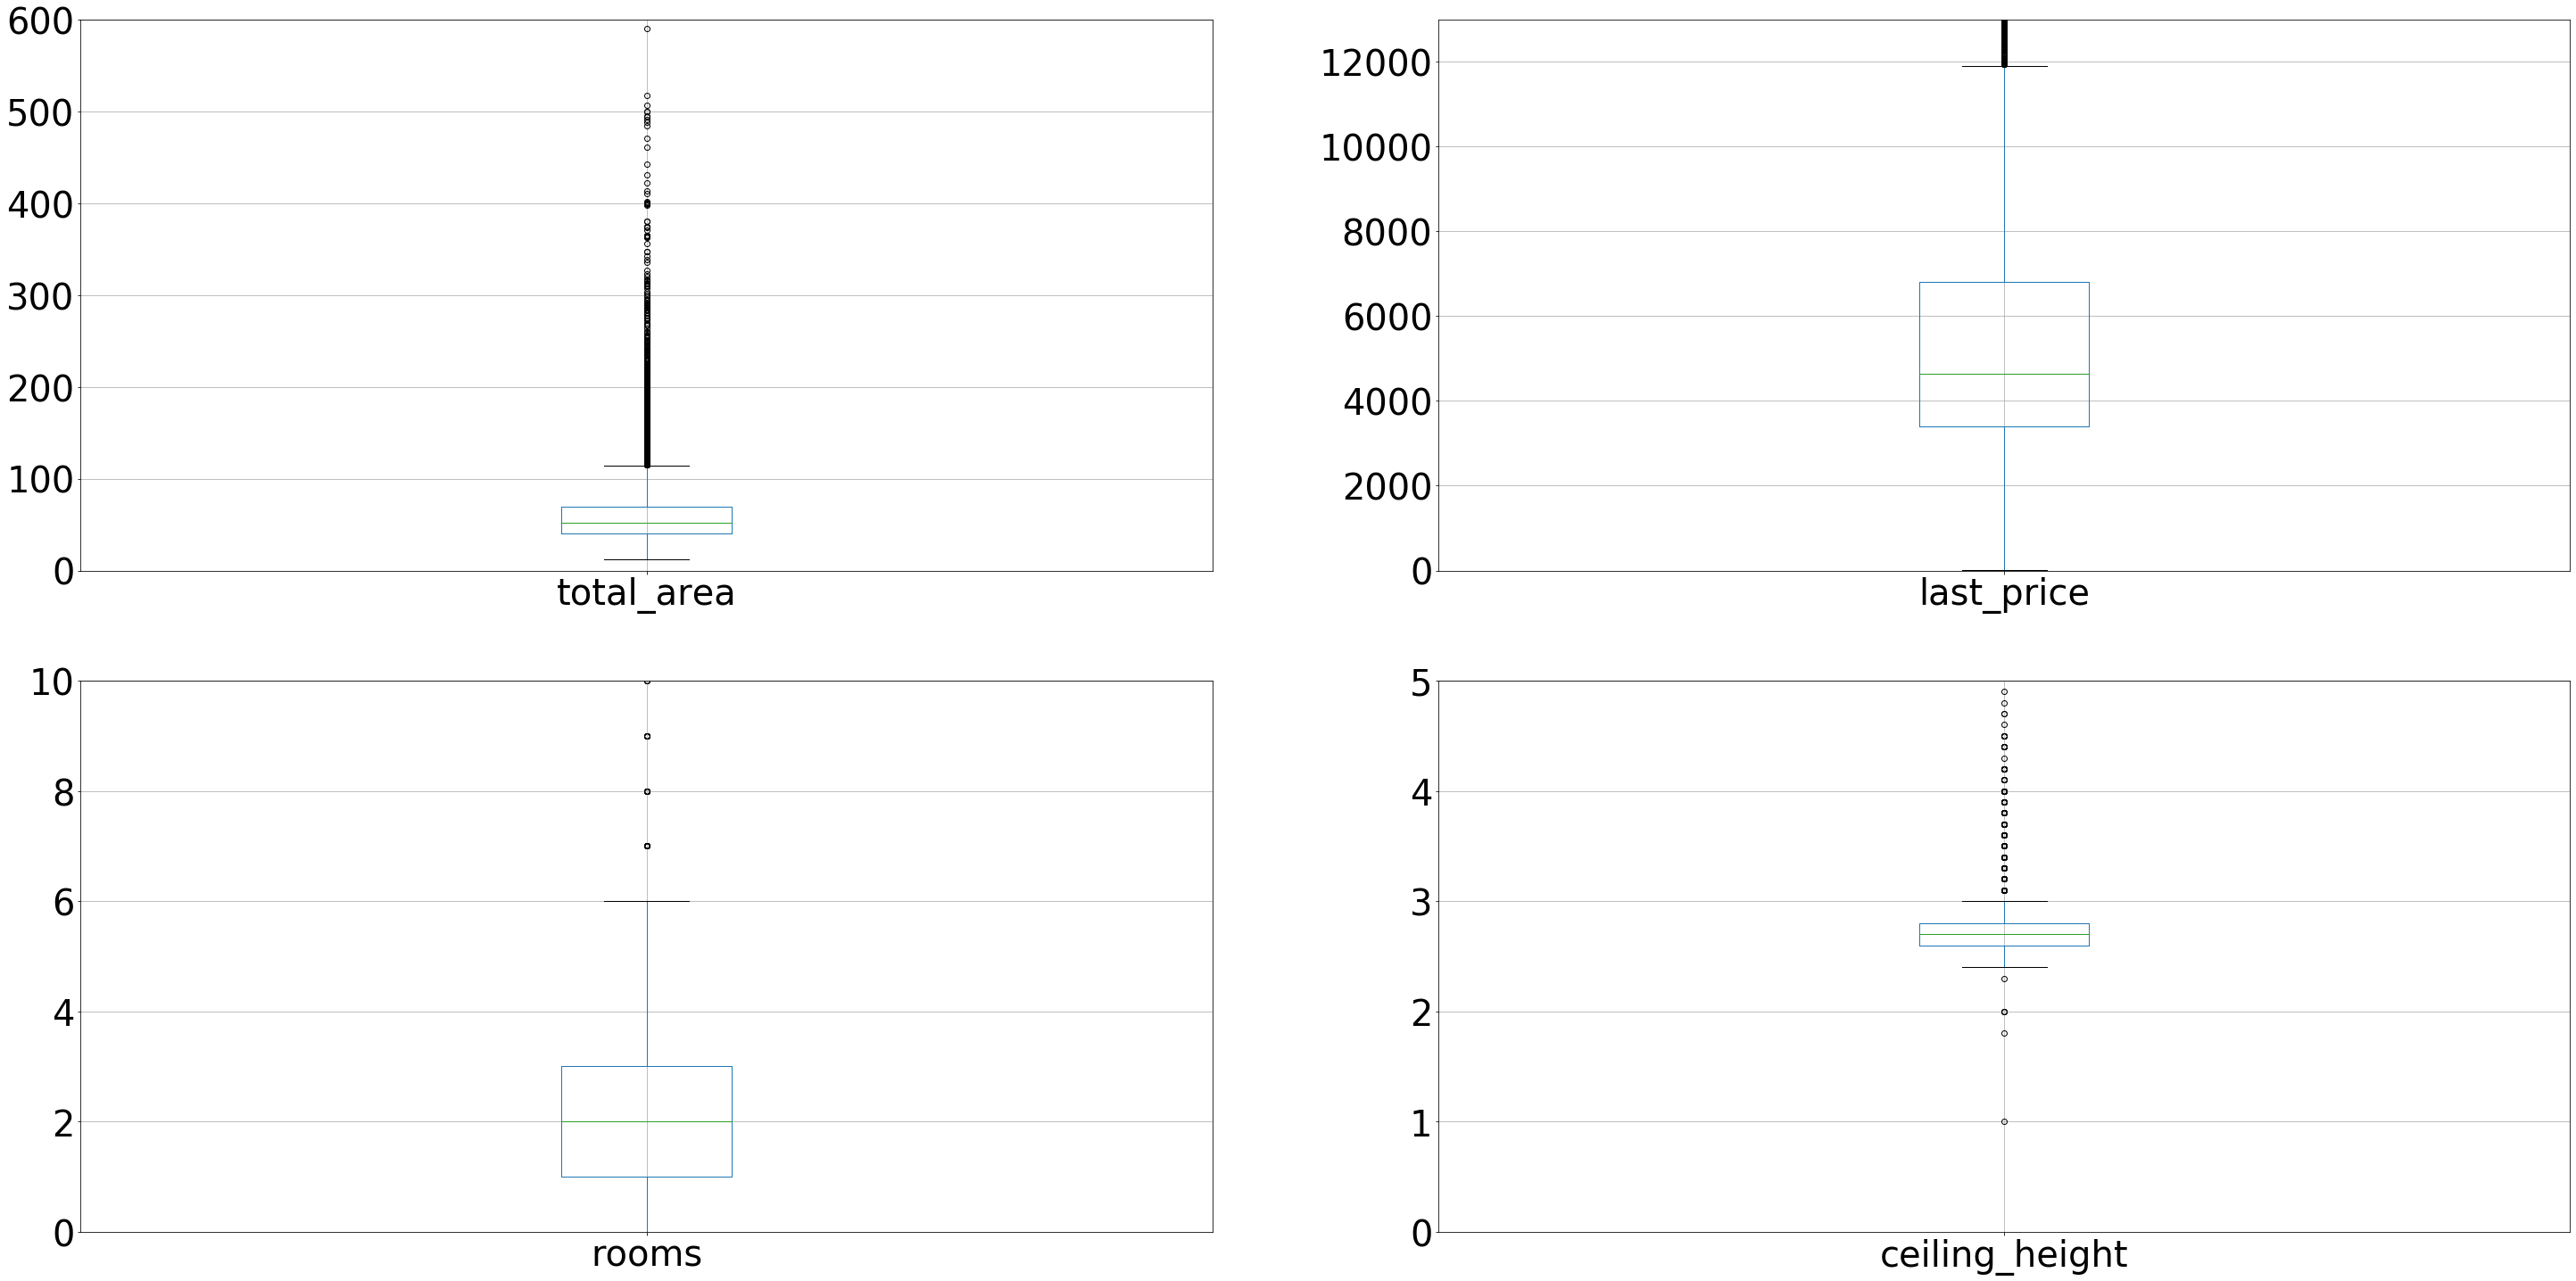

In [50]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [600, 13000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = aparts.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

Определяем границы:

total_area - 20-130 кв.м.;
last_price - 0-12 млн р.;
rooms - 0-6 комнат;
ceiling_height - 2,4-3,25м.

In [51]:
plt.style.use('seaborn-pastel') # установим, чтоб цвета круговой диаграммы всегда соотвествовали легенде

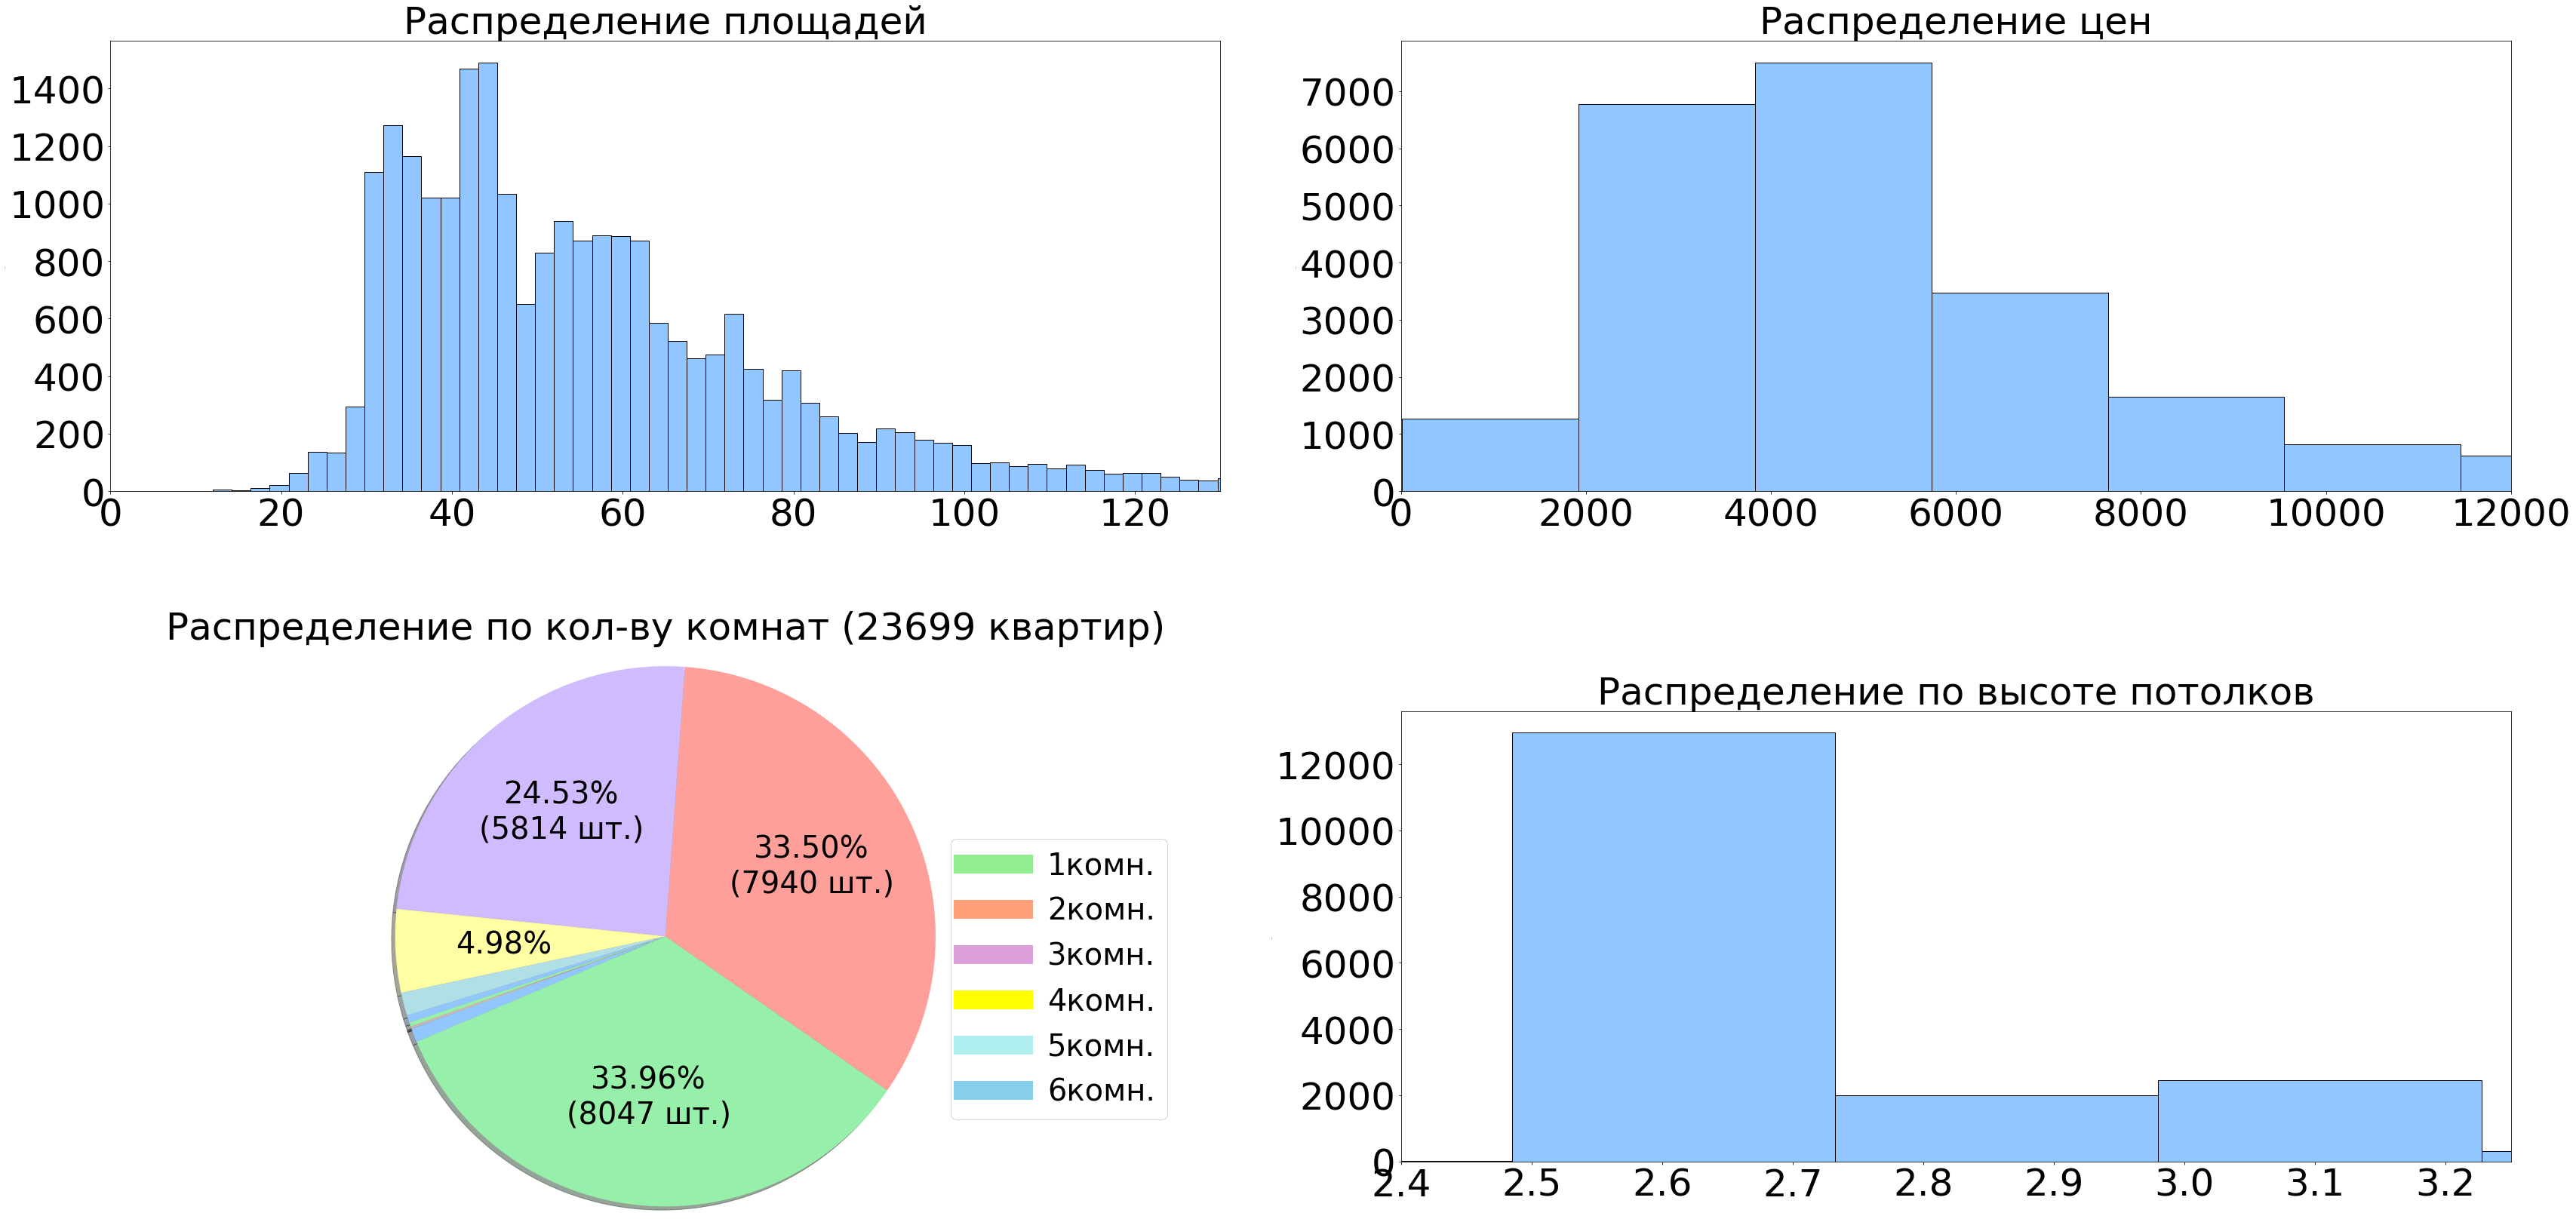

In [52]:
from matplotlib.lines import Line2D

plt.style.use('seaborn-pastel') 

# создаем отдельную сводную таблицу для создания круговой диаграммы
rooms_pivot = aparts.pivot_table(index='rooms', values='last_price', aggfunc='count')

df_list = [aparts['total_area'], aparts['last_price'], aparts['rooms'], aparts['ceiling_height']]
df_titles_list = ['Распределение площадей', 'Распределение цен', 
                  'Распределение по кол-ву комнат (23699 квартир)', 'Распределение по высоте потолков']
xlims_list = [130, 12000, 12, 3.25]
nrow = 2
ncol = 2

def func_pct(pct, data, sum_of_all):
    value = float(pct/100.*sum_of_all)
    if value > 5000:
        return "{:.2f}%\n({:.0f} шт.)".format(pct, value)
    elif value > 1000:
        return "{:.2f}%".format(pct)
    else:
        return ''

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(50,25))
count = 0
for r in range(nrow):
    for c in range(ncol):
        if df_titles_list[count] == 'Распределение по кол-ву комнат (23699 квартир)':
            sum_filt_aparts = rooms_pivot.sum()
            data_for_pct = rooms_pivot
            ax = rooms_pivot.plot(kind='pie', y="last_price", labels=None,
                                                            autopct = lambda pct: func_pct(pct,data_for_pct,sum_filt_aparts),
                                                            radius=1.5, shadow=True, startangle=200, fontsize=40,
                                                            title=df_titles_list[count], legend=True, 
                                                            pctdistance=0.6, labeldistance=0.5, ax=axes[r,c])
            custom_lines = [Line2D([0], [0], color='lightgreen', lw=25),
                            Line2D([0], [0], color='lightsalmon', lw=25),
                            Line2D([0], [0], color='plum', lw=25),
                            Line2D([0], [0], color='yellow', lw=25),
                            Line2D([0], [0], color='paleturquoise', lw=25),
                            Line2D([0], [0], color='skyblue', lw=25)]
            ax.title.set_size(50)
            ax.title.set_position([0.5, 1.15])
            ax.set_ylabel('')
            ax.legend(custom_lines, ['1комн.', '2комн.', '3комн.', '4комн.', '5комн.', '6комн.'], 
                      bbox_to_anchor=(1.1,0.75), prop={'size':40})
            plt.tight_layout(pad=10)
        else:
            ax = df_list[count].plot(kind='hist', bins=400, fontsize=50, title=df_titles_list[count], 
                                     ec='black', ax=axes[r,c])
            if count == 3:
                ax.set_xlim(2.4, xlims_list[count])
                ax.title.set_position([0.5, 1.15])
            else:
                ax.set_xlim(0, xlims_list[count])
            ax.title.set_size(50)
            ax.yaxis.label.set_size(0)
        count += 1

1. Гистограмма "Распределение площадей": Большая часть квартир имеет метраж от 30 до 80 кв.м., пик приходится на 50 кв.м. Есть квартиры и по 800м, но это единичные выбросы.
2. Гистограмма "Распределение цен": цена на квартиры лежит в промежутке от 3 до 12 млн. Большаячасть квартир продается за цену в промежутке между 3 и 6 млн. Опять же, есть выбросы, но ничего.
3. Круговая диаграмма "Распределение по количеству комнат": 2/3 квартир имеют 1 или 2 комнаты, чуть меньший процент имеют 3 комнаты и небольшое количество - 4. Есть и квартиры, имеющие больше комнат, но их процент сильно ниже.
4. Гистограмма "Распределение по высоте потолков": квартиры, в большинстве своем, имеют потолки от 2,5-2,75м (самый популярный вариант) до 3,2м. Остальные случаи - эксклюзивы.

Посмотрим на данные и гистограмму по времени продажи квартиры:

In [53]:
aparts['days_exposition'].describe().to_frame()

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


In [54]:
aparts['days_exposition'].median()

95.0

Есть квартиры, которые продавались 5 лет? Вполне возможно, но, как я предполагал ранее, есть вероятность, что это те объявления, которые вовремя не были закрыты, из-за этого срок продажи не соответствует реальным и имеет очень большое значение.
Среднее время продажи - полгода, 180 дней. Медианное - 95 дней.
3 месяца для продажи квартиры - очень неплохой срок.

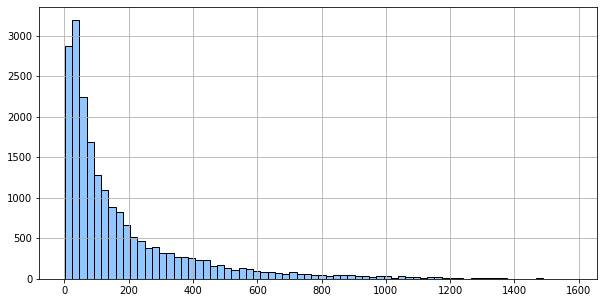

In [55]:
aparts['days_exposition'].hist(bins=70, figsize=(10,5), ec='black')

Большая часть квартир продавалась в течение первых 50 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи.

Посмотрим на boxplot:

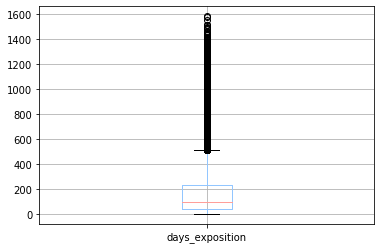

In [56]:
aparts.boxplot(column='days_exposition')

Ограничу срок продажи 500 днями, чтоб убрать выбросы. Посмотрим на данные более детально:

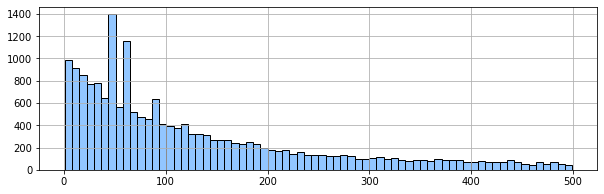

In [57]:
aparts.query('days_exposition<500')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Всё осталось прежним - чаще всего квартиры продаются в срок от 45 до 60 дней.

Посмотрим ближе наши пики в 45 и 60 дней.

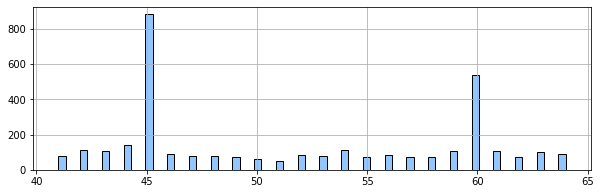

In [58]:
aparts.query('40<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Выглядит крайне странно. Вполне возможно, что сделки закрываются следующим образом: раз в 15 дней или на почту продавцу приходит вопрос, продал ли он квартиру, он заходит и делает соответствующую пометку, или ему звонит оператор и по телефону задает тот же вопрос и закрывает/не закрывает объявление согласно полученной информации. Таким образом, учитывая то, что многие самостоятельно не закрывают объявления, что большая часть квартир продается в пределах 60 дней с момента публикации объявления и что проверка производится раз в 15 дней, имеем такие вот данные. На всякий случай, учтем ещё и другое количество дней, кратное 15, - 30:

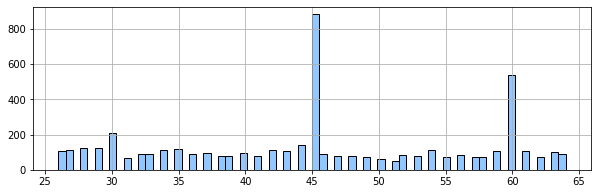

In [59]:
aparts.query('25<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Можно с уверенностью сказать, что теория подтвердилась.

3.1 Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от числа комнат, этажа и удалённости от центра.

Для прорисовки графиков напишем функцию:

In [60]:
def depend_price(df, column):
    title_dict = {'rooms': 'Зависимость цены от количества комнат', 'level': 'Зависимость цены от этажа',
                  'fromcenter_category': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'cityCenters_nearest_kms': 'Зависимость цены от удаленности от центра города'}
    plt.style.use('seaborn-pastel')
    if column == 'level' or column == 'fromcenter_category':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'fromcenter_category':
        fontsize = 12
    else:
        fontsize = 15
    df_filtered = df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="last_price", kind='bar', ec='black', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(9,4))
    ax2 = plt.gca()  # удалим xlabel - у нас и так есть многоговорящее название графика
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'cityCenters_nearest_kms':
        plt.xticks(rotation=0)
    return plot

Смотрим зависимость цены от количества комнат:

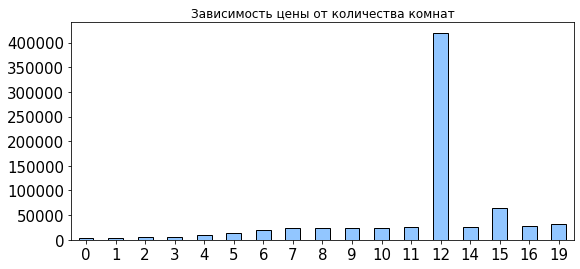

In [61]:
depend_price(aparts, 'rooms')

Посмотрим на выбросы:

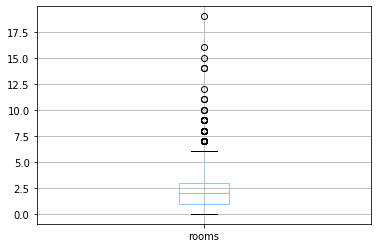

In [62]:
aparts.boxplot(column='rooms')

Смотрим без выбросов:

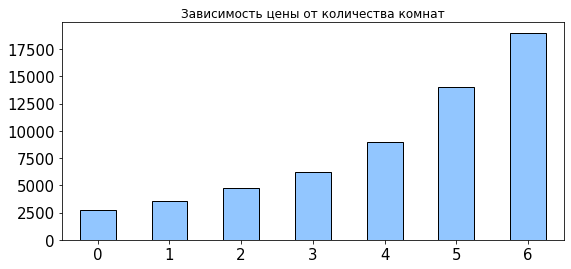

In [63]:
depend_price(aparts.query('rooms <= 6'), 'rooms')

Всё так. Чем больше комнат, тем выше цена - так продолжается до 7 комнат. Далее - единичные значения (выбросы). Вполне возможно, что дальше идут бывшие коммуналки на продажу?

Теперь берёмся за этажи (по категориям: 'первый', 'последний', 'другой').

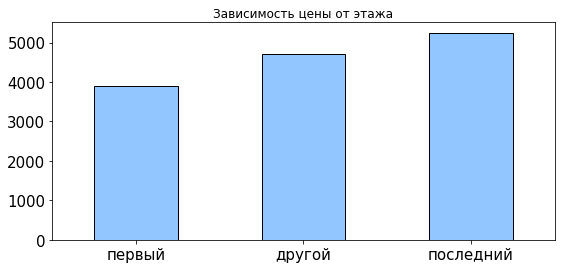

In [64]:
depend_price(aparts, 'level')

Цены на квартиры на 1ом этаже в среднем на %20 ниже, чем цены на квартиры, расположенные на других этажах, кроме последнего. На последнем этаже, конечно, подороже, чем на 1ом, но дешевле чем на других.

По удалённости от центра по созданным ранее категориям (столбец fromcenter_category):

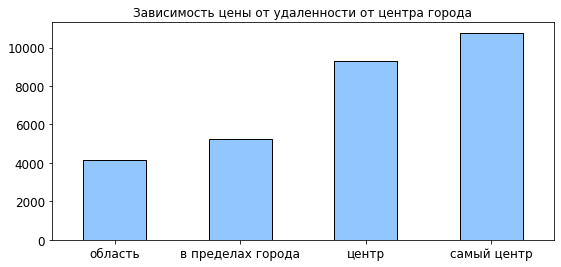

In [65]:
depend_price(aparts, 'fromcenter_category')

График подтвердил реальное положение дел: чем дальше от города, тем дешевле.

3.2. Теперь исследуем зависимость цены от дня недели, месяца и года.
Построим график зависимости средней цены от дня недели, месяца и года публикации объявления:

Напишем под эти цели свою функцию:

In [66]:
def dmy_price(df, ylims=None):
    dmy_to_plot = ['day', 'month', 'year']
    titles = ['Медиана цен по дню недели', 'Медиана цен по месяцу', 'Медиана цен по году']

    for i in range(len(dmy_to_plot)):
        df_to_plot = aparts.groupby(dmy_to_plot[i]).median()['last_price'].reset_index().sort_values(by=dmy_to_plot[i])
        if ylims is None:
            plot = df_to_plot.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(10,5), ec='black',
                                   legend=False, title=titles[i], fontsize=15)
        else:
            plot = df_to_plot.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(10,5), ec='black',
                               legend=False, title=titles[i], fontsize=15, ylim=ylims[i])
        ax2 = plt.gca()
        x_axis = ax2.xaxis
        x_axis.label.set_visible(False)
        if dmy_to_plot[i] != 'day':
            plt.xticks(rotation=0)
    return plot

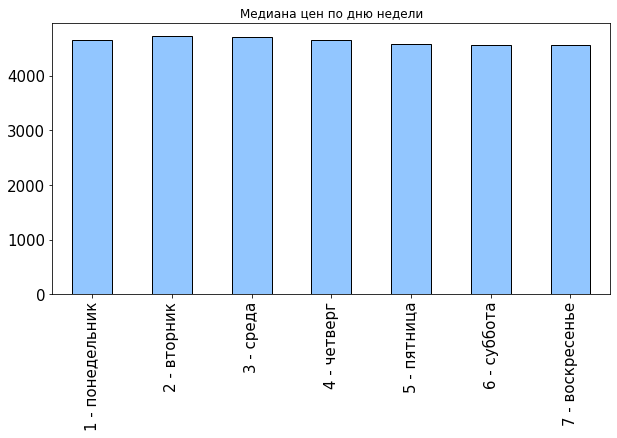

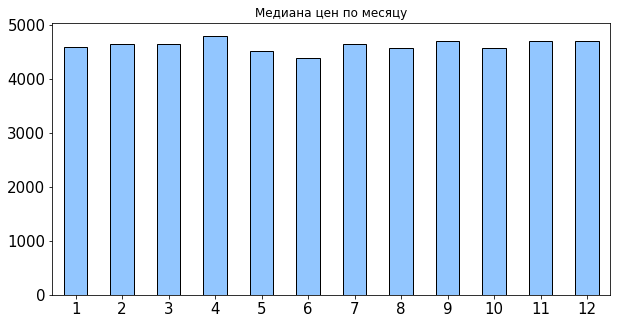

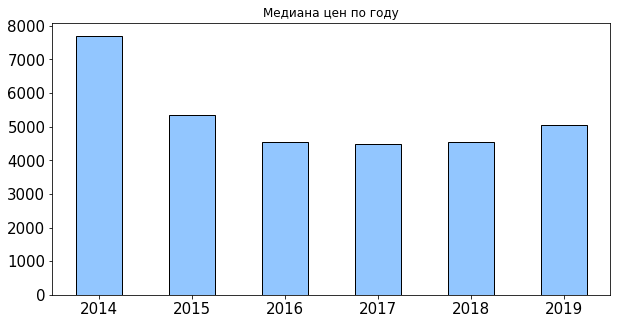

In [67]:
dmy_price(aparts)

Из этих данных ничего не ясно. Увеличим размеры каждого графика по вертикали и ограничим каждый график по оси Oy интервалом значений (4000, 4900) для дня недели и месяца и (4000, 8000) для года:

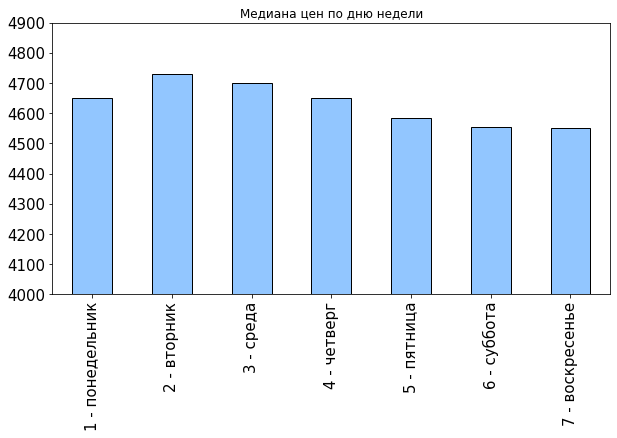

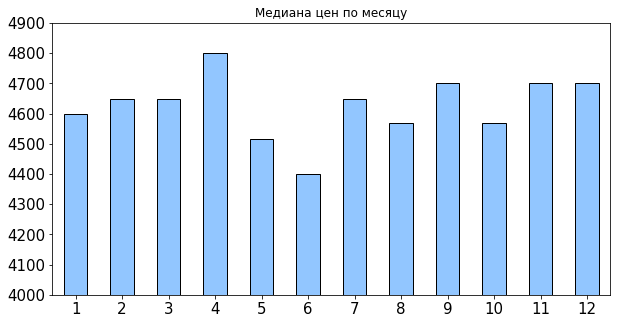

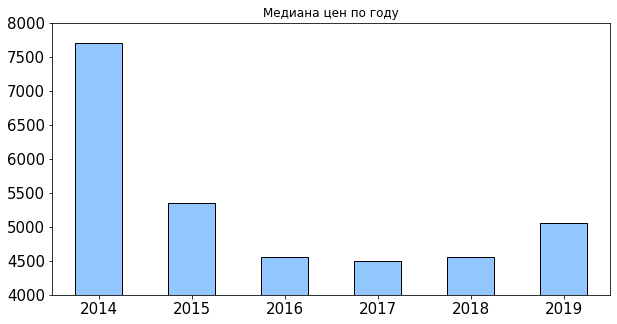

In [68]:
dmy_price(df=aparts, ylims=[(4000, 4900), (4000, 4900), (4000, 8000)])

Теперь можно и обсудить:

зависимость цены от дня недели публикации практически никак не зависит. Единственное, что можно сказать, так это то, что в среднем цены на квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена на квартиры с объявлениями, опубликованными в выходные дни;

зависимость цены от месяца публикации - апрель оказался самым "деловым": цены на квартиры, чьи объявления о продаже были опубликованы в апреле, выше, чем по остальным месяцам. Особенно выделяется медиана цен на квартиры по июньским объявлениям - довольно низкие в сравнении с другими месяцами;

зависимость цены от года публикации - 2014г. тут очень выделяется. Рассмотрим его чуть подробнее (по месяцам) и сделаем общий вывод про зависимость цены от года публикации:

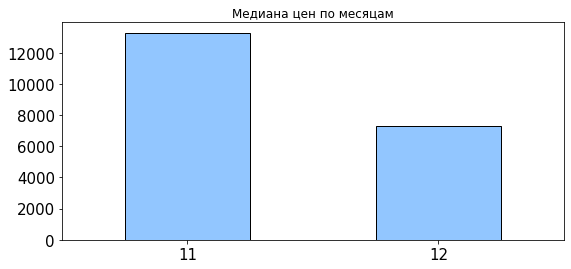

In [69]:
depend_price(aparts.query('year == 2014'), 'month')

Видим, что наши в наших данных есть информация только о 11 и 12 месяцах 2014 года (и позднее).
Предполагаю, что такие высокие цены были вызваны ажиотажем на рынке недвижимости, вызванным довольно скоротечным ослаблением рубля. По этой причине, спрос мог превышать предложение (учитывая то, какими активными участниками рынка стали те же граждане СНГ, у которых валюта пока не ослабла), отсюда и цены такие.
К декабрю всё пошло на убыль, т.к.:
1) валюты граждан других близележащих стран тоже начали слабеть;
2) в предновогодний месяц вряд ли вообще рынок недвижимости такой активный.
В 2019г. цена стала опять расти. Предполагаю, что связано с тем, что после 5 лет застоя рынок недвижимости проснулся - больше и больше граждан могут себе позволить приобрести недвижимость. Рост спроса -> рост цен.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Данные берем из столбца locality_name.

In [70]:
top10 = aparts['locality_name'].value_counts().index.tolist()[:10]
mean10_metrics = [aparts[aparts['locality_name'] == city]['price_of_m2'].median().round(2) for city in top10]
mean10_prices = [aparts[aparts['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., тыс. руб.': mean10_metrics, 'Средняя цена за квартиру, тыс. руб.': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
dataframe

,Город,"Средняя цена за кв.м., тыс. руб.","Средняя цена за квартиру, тыс. руб."
0,Санкт-Петербург,104.76,5500.0
4,Пушкин,100.00,5180.0
8,деревня Кудрово,91.86,3790.0
6,посёлок Парголово,91.64,4100.0
1,посёлок Мурино,85.88,3400.0
2,посёлок Шушары,76.88,3950.0
5,Колпино,74.72,3600.0
7,Гатчина,67.80,3100.0
3,Всеволожск,65.79,3450.0
9,Выборг,58.16,2897.0


Как и ожидалось, самые дорогие квартиры (что за всё жилье, что за 1 кв.м.) в Санкт-Петербурге и парковом городе Пушкине. Чем дальше от города, тем дешевле. В Выборге средняя цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.

Изучим предложения квартир. Для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [71]:
aparts_spb = aparts.query('locality_name == "Санкт-Петербург"')
aparts_spb.loc[:, 'cityCenters_nearest_kms'] = (aparts_spb.loc[:, 'cityCenters_nearest']/1000).round()
aparts_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,fromcenter_category,price_of_m2,year,month,day,level,living_area_part,kitchen_area_part,cityCenters_nearest_kms
0,20,13000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,NaN,в пределах города,120.370,2019,3,4 - четверг,другой,0.47,0.23,16.0
2,10,5196,56.0,2015-08-20,2,2.7,5.0,34.3,4,NaN,...,558.0,в пределах города,92.785,2015,8,4 - четверг,другой,0.61,0.15,14.0
3,0,64900,159.0,2015-07-24,3,2.7,14.0,NaN,9,NaN,...,424.0,в пределах города,408.176,2015,7,5 - пятница,другой,NaN,NaN,7.0
4,2,10000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,121.0,в пределах города,100.000,2018,6,2 - вторник,другой,0.32,0.41,8.0
7,5,7915,71.6,2019-04-18,2,2.7,24.0,NaN,22,NaN,...,NaN,в пределах города,110.544,2019,4,4 - четверг,другой,NaN,0.26,12.0


Строим график медианной цены в зависимости от удаленности от города:

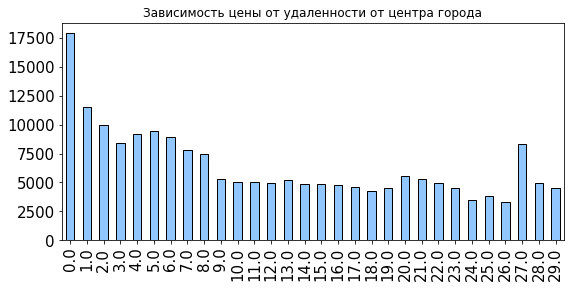

In [72]:
depend_price(aparts_spb, 'cityCenters_nearest_kms')

Ожидаемо, что в самом центре (в радиусе до 1 км) медианная цена на квартиру стремится к 20 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена довольно заметно падает. Однако, цены на 4-7км сравнимы с ценами на квартиры, расположенные в 2 км от центра. Предполагаю, что это влияние на чуть более высокую, чем ожидалось, медианную цену оказывают определенные районы типа Василеостровского, Приморского и Петроградского, которые не считаются центральными, но при этом считаются достаточно элитными.

Прошу заметить, что на графике присутствуют значения по расстоянию от центра, превышающие 17 км, которые мы определили ранее. Тем не менее, название населенного пункта в этих столбцах - "Санкт-Петербург". Посмотрим на их количество:

In [73]:
aparts_spb.query('cityCenters_nearest_kms > 17').sort_values(by='cityCenters_nearest_kms', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,fromcenter_category,price_of_m2,year,month,day,level,living_area_part,kitchen_area_part,cityCenters_nearest_kms
13031,16,4200,56.8,2018-07-04,2,3.5,3.0,27.9,1,NaN,...,187.0,область,73.943,2018,7,3 - среда,первый,0.49,0.19,29.0
10798,10,4850,62.0,2017-05-16,3,2.7,5.0,35.7,1,False,...,63.0,область,78.225,2017,5,2 - вторник,первый,0.58,0.12,29.0
19892,20,4370,54.7,2016-03-23,3,2.5,5.0,32.8,5,NaN,...,939.0,область,79.890,2016,3,3 - среда,последний,0.60,0.13,29.0
11652,16,4700,51.0,2016-06-07,2,2.6,5.0,30.0,1,NaN,...,539.0,область,92.156,2016,6,2 - вторник,первый,0.59,0.16,29.0
16787,20,4850,85.8,2019-04-22,3,3.6,3.0,49.4,2,NaN,...,NaN,область,56.526,2019,4,1 - понедельник,другой,0.58,0.14,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,14,3200,37.4,2018-02-28,1,2.5,9.0,20.0,4,NaN,...,104.0,область,85.561,2018,2,3 - среда,другой,0.53,0.17,18.0
12184,7,4400,36.0,2018-01-10,1,2.5,14.0,20.0,3,NaN,...,28.0,область,122.222,2018,1,3 - среда,другой,0.56,0.17,18.0
12154,7,3999,35.6,2018-11-28,1,2.5,14.0,17.5,14,NaN,...,NaN,область,112.331,2018,11,3 - среда,последний,0.49,0.22,18.0
12120,9,3200,33.4,2017-04-18,1,2.7,9.0,20.3,5,NaN,...,195.0,область,95.808,2017,4,2 - вторник,другой,0.61,0.16,18.0


Могу предположить, что центр мог считаться не историческим центром Санкт-Петербурга, а какой-либо другой точкой, или же расстояние считалось не по прямой, а по дорогам. А может быть, это Кронштадт, который считается Санкт-Петербургом. Особенно если посмотреть на 27 км от центра, где цены от жилья неожиданно высокие по сравнению с соседними значениями - могут сравниться с ценами в пределах центральной зоны Санкт-Петербурга. В том или ином случае, оставим это как есть, раз информация уже присутствовала в таблице. Тем более, квартир с такими параметрами не так много.

Выделим сегмент квартир в центральной зоне (до 8 км включительно) и проанализируем эту территорию - изучим следующие параметры:

площадь;
цена;
число комнат;
высота потолков.

In [74]:
aparts_in_center = aparts_spb.query('cityCenters_nearest <= 8000')

Узнаем количество строк датафрейма aparts_in_center для того, чтоб указать выборку при прорисовке статистических графиков:

In [75]:
print('Выборка квартир в центральной зоне Санкт-Петербурга -', aparts_in_center.shape[0], 'квартир')

Выборка квартир в центральной зоне Санкт-Петербурга - 3728 квартир


Выборка квартир в центральной зоне Санкт-Петербурга - 3728 квартир
Сначала построим такие же гистограммы распределения для площади, цены, числа комнат и круговую диаграмму для высоты потолков (используем те же лимиты по Ox, которые использовали при построении данных для всего датафрейма):

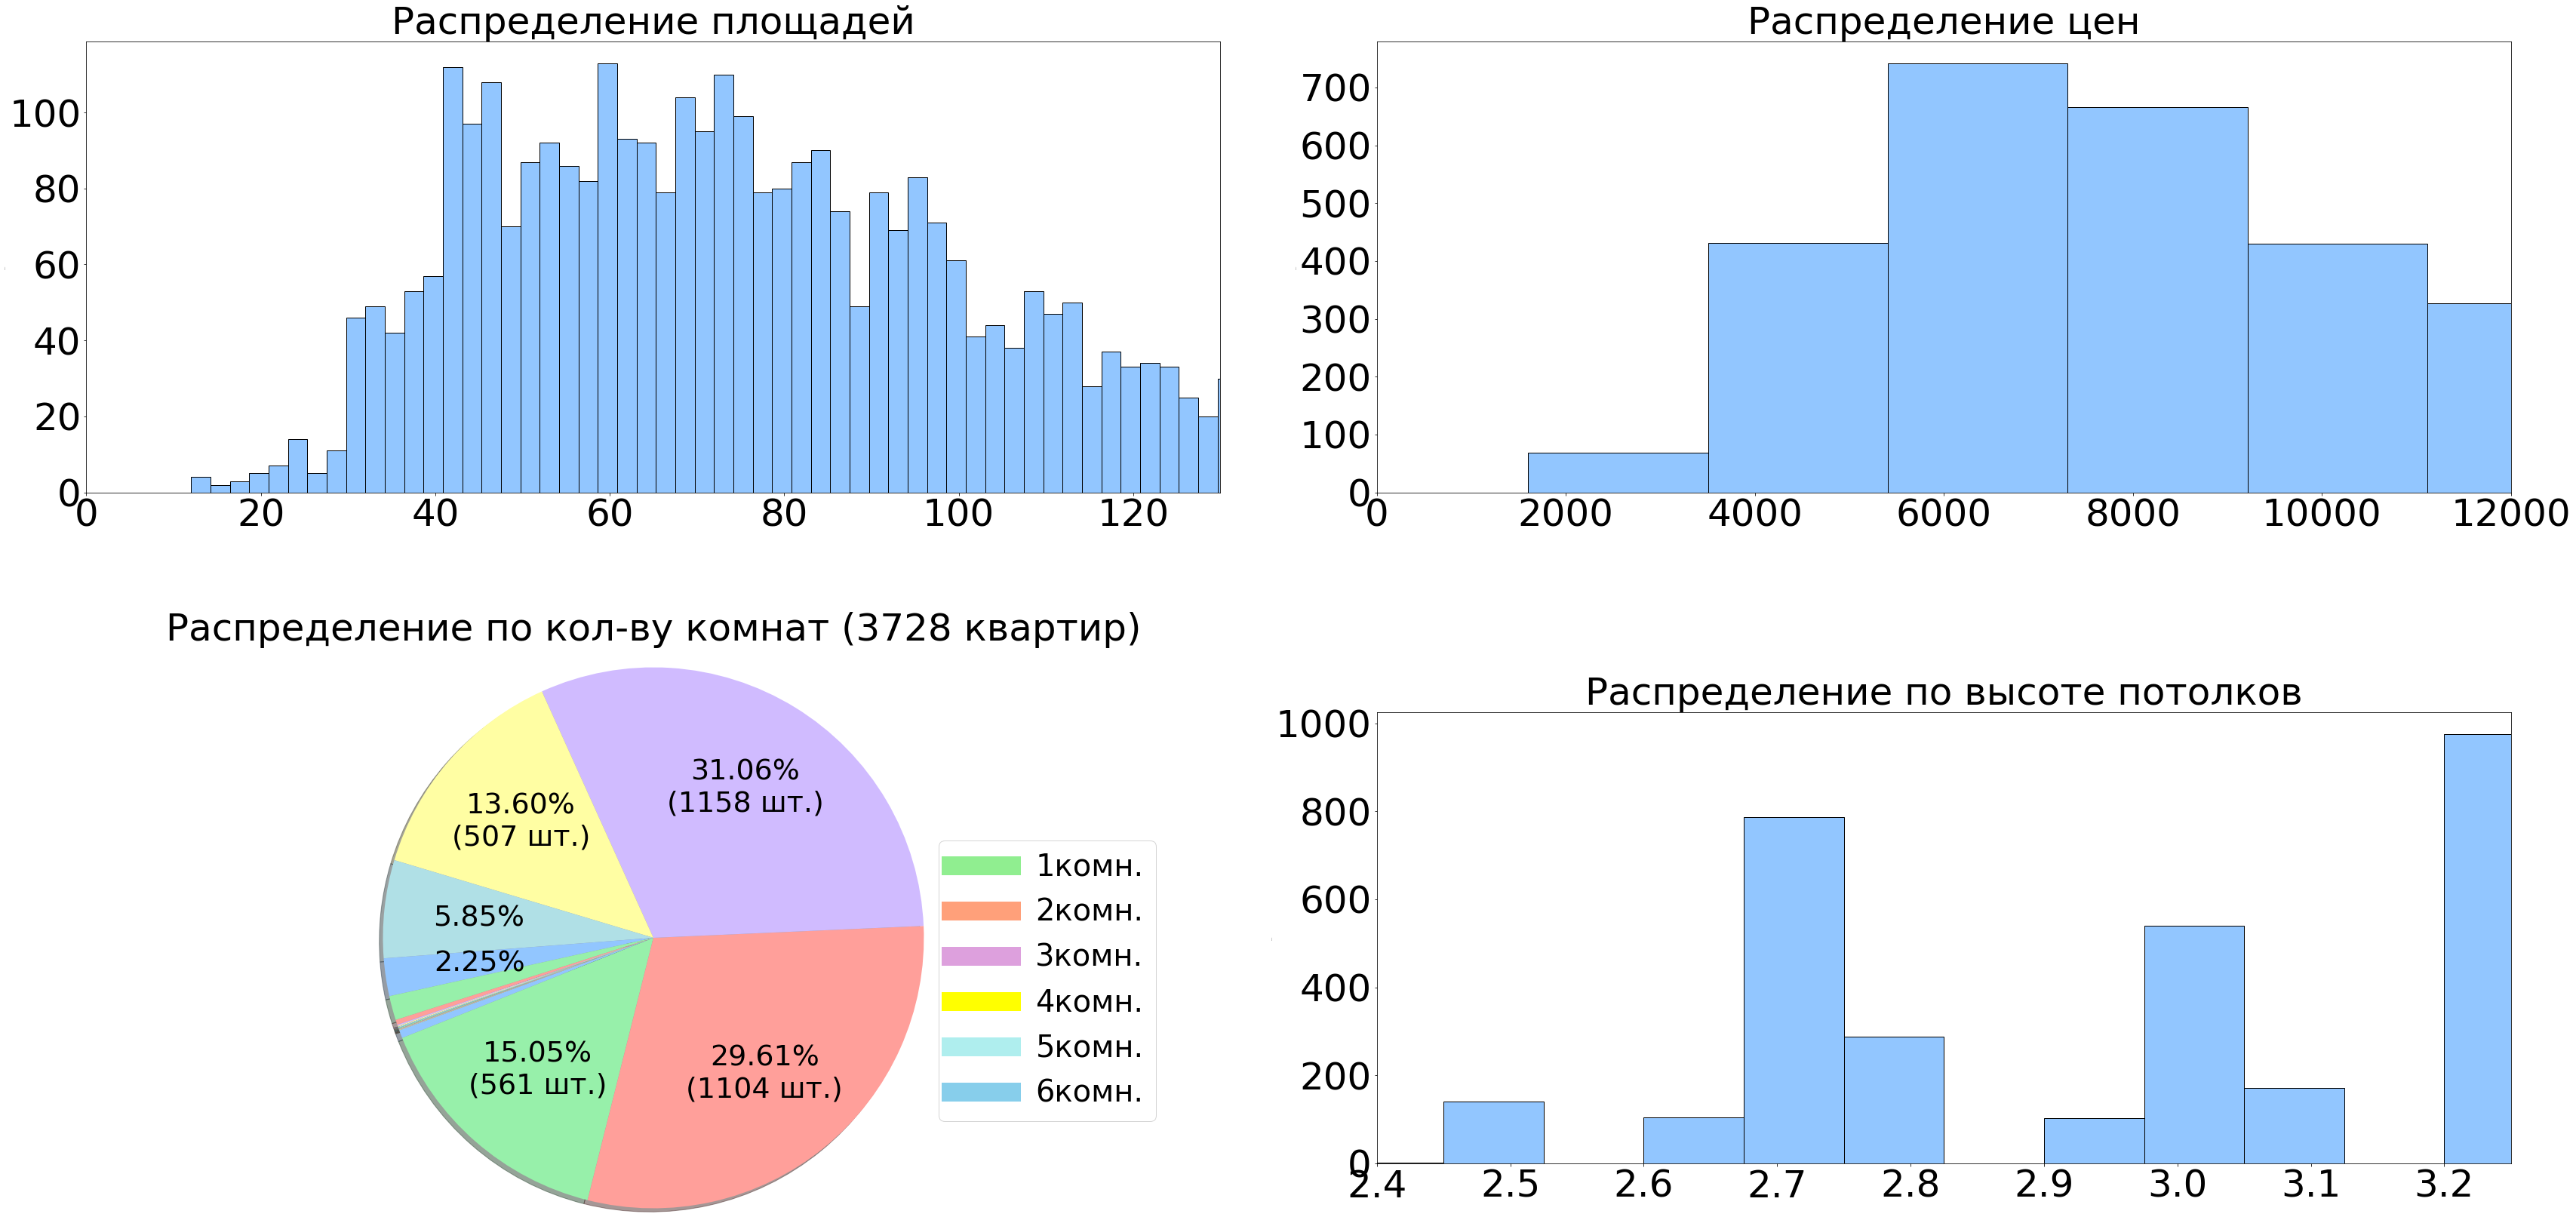

In [76]:
# отдельно создадим сводную для круговой диаграммы
aparts_in_center_rooms_pivot = aparts_in_center.pivot_table(index='rooms', values='last_price', aggfunc='count')

df_list = [aparts_in_center['total_area'], aparts_in_center['last_price'], 
           aparts_in_center['rooms'], aparts_in_center['ceiling_height']]
df_titles_list = ['Распределение площадей', 'Распределение цен', 
                  'Распределение по кол-ву комнат (3728 квартир)', 'Распределение по высоте потолков']
xlims_list = [130, 12000, 12, 3.25]

# функция для отображения процентов на pie
def func_pct(pct, data, sum_of_all):
    value = float(pct/100.*sum_of_all)
    if value > 220:
        return "{:.2f}%\n({:.0f} шт.)".format(pct, value)
    elif value > 60:
        return "{:.2f}%".format(pct)
    else:
        return ''

ncol = 2
nrow = 2
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(50,25))
line_1 = 'Спасибо тебе!'
count = 0
for r in range(nrow):
    for c in range(ncol):
        if df_titles_list[count] == 'Распределение по кол-ву комнат (3728 квартир)':
            data_for_pct = aparts_in_center_rooms_pivot
            sum_filt_aparts = aparts_in_center_rooms_pivot.sum()
            ax = aparts_in_center_rooms_pivot.plot(kind='pie', y="last_price", 
                                                            radius=1.5, shadow=True, startangle=200, fontsize=38,
                                                            autopct = lambda pct: func_pct(pct,data_for_pct,sum_filt_aparts),
                                                            title=df_titles_list[count], legend=True, labels=None,
                                                            pctdistance=0.65, labeldistance=0.5, ax=axes[r,c])
            custom_lines = [Line2D([0], [0], color='lightgreen', lw=25),
                            Line2D([0], [0], color='lightsalmon', lw=25),
                            Line2D([0], [0], color='plum', lw=25),
                            Line2D([0], [0], color='yellow', lw=25),
                            Line2D([0], [0], color='paleturquoise', lw=25),
                            Line2D([0], [0], color='skyblue', lw=25)]
            ax.title.set_size(50)
            ax.title.set_position([0.5, 1.15])
            ax.set_ylabel('')
            ax.legend(custom_lines, ['1комн.', '2комн.', '3комн.', '4комн.', '5комн.', '6комн.'], 
                      bbox_to_anchor=(1.1,0.75), prop={'size':40})
            plt.tight_layout(pad=10)
        else:
            ax = df_list[count].plot(kind='hist', bins=400, fontsize=50, title=df_titles_list[count], 
                                     ec='black', ax=axes[r,c])
            if count == 3:
                ax.set_xlim(2.4, xlims_list[count])
                ax.title.set_position([0.5, 2.15])
            else:
                ax.set_xlim(0, xlims_list[count])
            ax.title.set_size(50)
            ax.yaxis.label.set_size(0)
        count += 1

1. Гистограмма "Распределение площадей": Большая часть квартир имеет метраж от 50 до 100 кв.м., пиков много, основные - 60, 70 и 90 кв.м.
2. Гистограмма "Распределение цен": цена на квартиры лежит, в основном, в промежутке от 4,5 до 12 млн р. Большая часть квартир продается за цену в промежутке между 7,5 и 10 млн р.
3. Круговая диаграмма "Распределение по количеству комнат": Больше всего 2- и 3комнатных квартир, чуть меньше - 4хкомнатных. Однокомнатных вообще почти нет (всего 6%) от общего количества.
4. Гистограмма "Распределение по высоте потолков": квартиры, в большинстве своем, имеют потолки 3,25м. Ещё некоторые квартиры имеют высоту потолков от 2,75 до 3,5м. Ниже, выше - редкость.

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Исследуем зависимость цены на квартиру в центральной зоне Санкт-Петербурга от количества комнат:

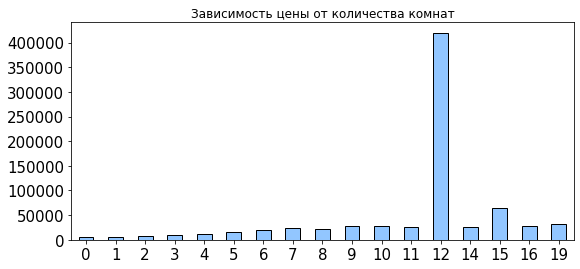

In [77]:
depend_price(aparts_in_center, 'rooms')

Ограничимся 6 комнатами, как при работе со всем датафреймом:

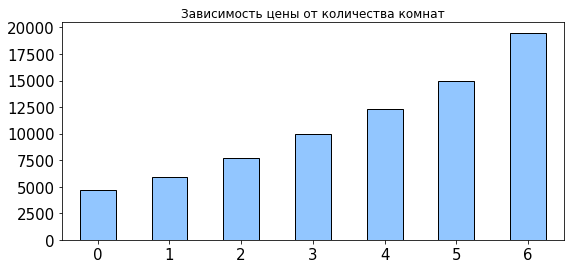

In [78]:
depend_price(aparts_in_center.query('rooms <= 6'), 'rooms')

Чем больше комнат, тем выше цена. В центре всё просто.

Зависимость цены от этажа:

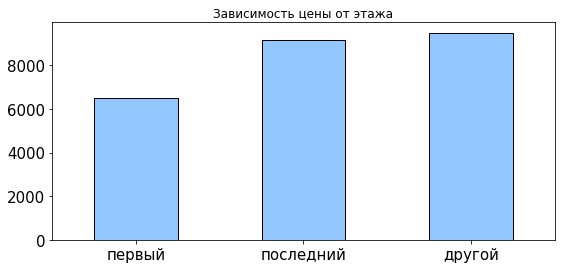

In [79]:
depend_price(aparts_in_center, 'level')

1ый этаж самый дешевый (аж на 25%), заехать на любой другой этаже будет подороже.

Зависимость цены от удаленности от центра (в пределах центральной зоны города):

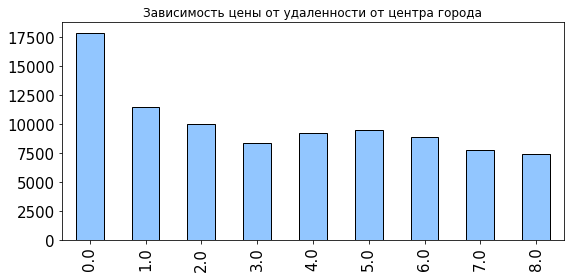

In [80]:
depend_price(aparts_in_center, 'cityCenters_nearest_kms')

Чем дальше от Дворцовой, тем дешевле.

Зависимость цены от даты размещения объявления:

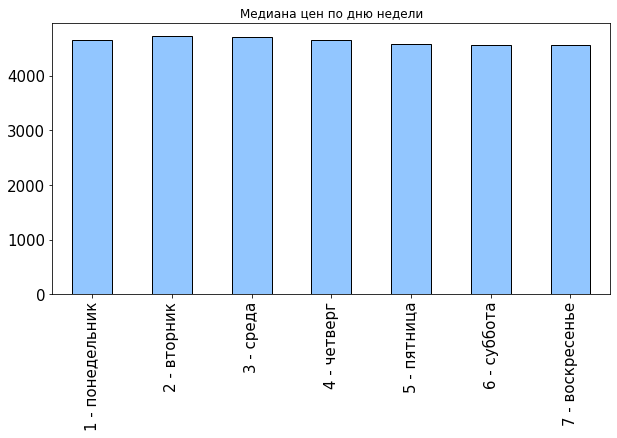

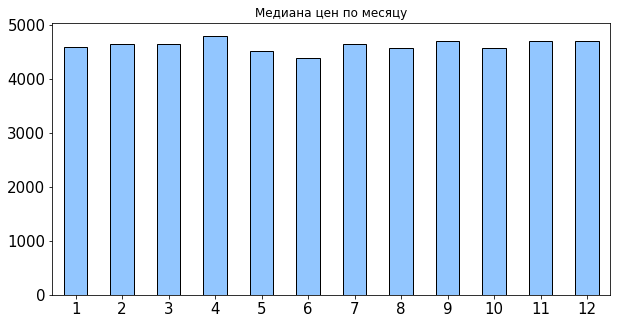

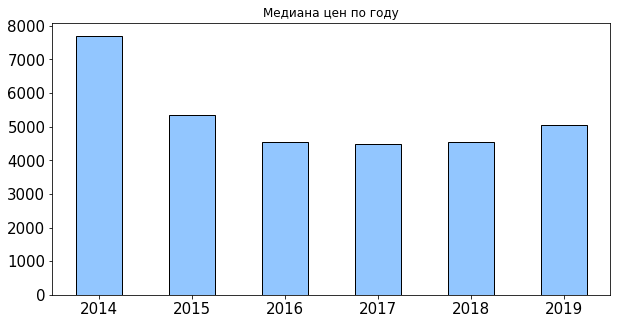

In [81]:
dmy_price(aparts_in_center)

Опять мало что ясно, как и при исследовании всех данных. Ограничим значения по оси Oy:

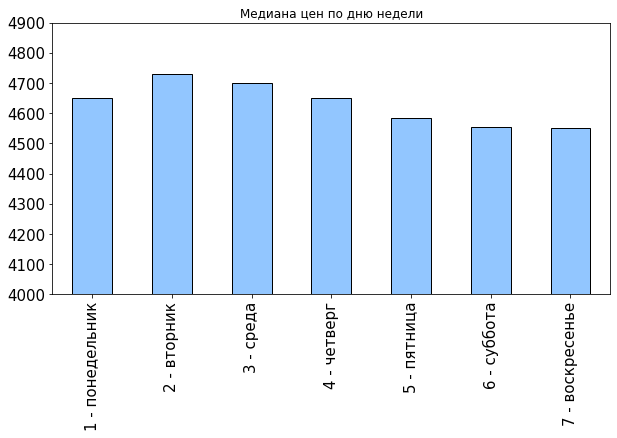

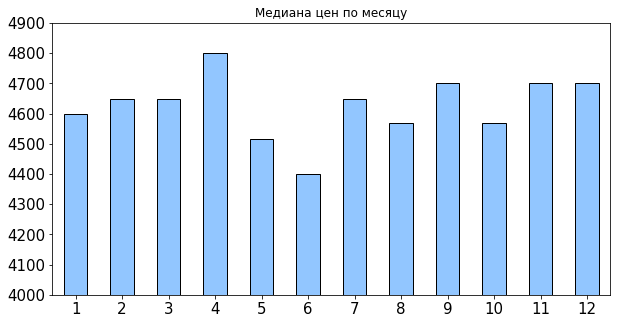

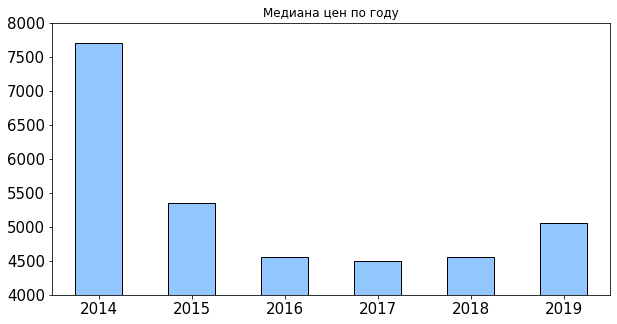

In [82]:
dmy_price(df=aparts_in_center, ylims=[(4000, 4900), (4000, 4900), (4000, 8000)])

Цена квартиры от дня недели, когда опубликовали объявление о продаже, почти не зависит. Зависимость по месяцу и году опубликованя объявления есть - такая же, как и по всем данным.

Ответим на вопросы "Отличаются ли выводы по центру СПб от общих выводов по всему городу?" и "Как между собой отличаются выводы о зависимости цен от разных факторов по центру СПб, по всему городу и по СПб + ЛО?".

Для наглядности построим необходимые графики для Санкт-Петербурга + Лен. области, отдельно для города Санкт-Петербурга и отдельно для его центральной зоны, включая Санкт-Петербург, на одной оси:

Ради интереса посмотрим на гистограмму по времени продажи квартир в центре СПб, в СПб и в СПб+ЛО:

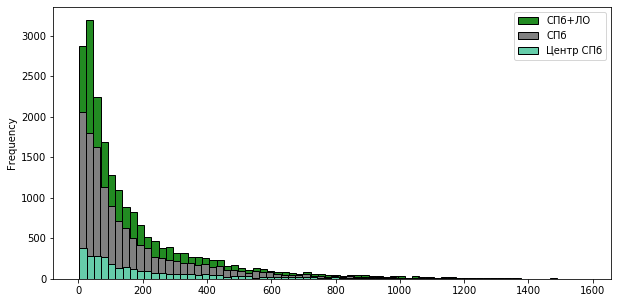

In [83]:
ax = plt.gca()

aparts['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='forestgreen')
aparts_spb['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='grey')
aparts_in_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='mediumaquamarine')
plt.legend(['СПб+ЛО', 'СПб', 'Центр СПб'])

Отбросим хвост и посмотрим ближе данные. Ограничимся 500 днями, как и при работе со всеми данными:

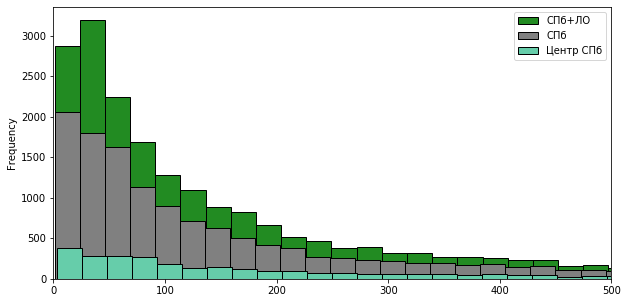

In [84]:
ax = plt.gca()

aparts['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='forestgreen', xlim=(0, 500))
aparts_spb['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='grey', xlim=(0, 500))
aparts_in_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', 
                                         ax=ax, color='mediumaquamarine', xlim=(0, 500))
plt.legend(['СПб+ЛО', 'СПб', 'Центр СПб'])

Ещё ближе посмотрим на данные за полгода (183 дня):

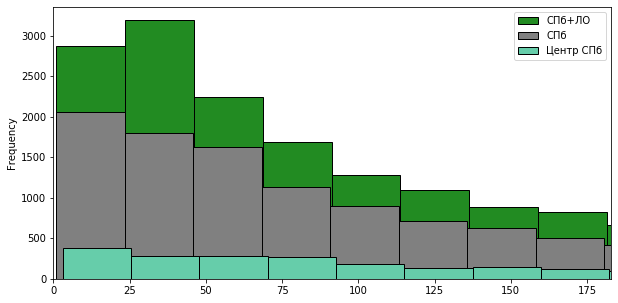

In [85]:
ax = plt.gca()

aparts['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='forestgreen', xlim=(0, 183))
aparts_spb['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', ax=ax, color='grey', xlim=(0, 183))
aparts_in_center['days_exposition'].plot(kind='hist', bins=70, figsize=(10,5), ec='black', 
                                         ax=ax, color='mediumaquamarine', xlim=(0, 183))
plt.legend(['СПб+ЛО', 'СПб', 'Центр СПб'])

Обычно квартиры продаются в течение первых 25 дней. Это касается как всей территории СПб + ЛО в среднем, так и центра СПб. По самому СПб ситуация немного иная - большая часть квартир продается в срок от 25 до 50 дней. Получается, что на общую картину (СПб+ЛО) влияют продажи в области - в области они сильно дешевле, предполагаю, что поэтому переезжающие на ПМЖ в Санкт-Петербург люди просто охотятся за этими дешевыми квартирами, несмотря на их удаленость от города. В центре жить любят многие, поэтому и спрос на эти квартиры тоже велик. А вот, например, в Большом Оккервиле не каждый жить захочет - и не центр, и не область, но при этом недёшево.

Создадим функцию на основе уже созданной depend_price для прорисовки последующих графиков:

In [86]:
def depend_price_multiple(list_of_dfs, column):
    dfs_dict = {'СПб+ЛО': aparts, 'СПб': aparts_spb, 'Центр СПб': aparts_in_center,
                'СПб+ЛО фильтр': aparts.query('rooms <= 6'), 
                'СПб фильтр': aparts_spb.query('rooms <= 6'),
                'Центр СПб фильтр': aparts_in_center.query('rooms <= 6')}
    title_dict = {'rooms': 'Зависимость цены от количества комнат', 'level': 'Зависимость цены от этажа',
                  'fromcenter_category': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'cityCenters_nearest_kms': 'Зависимость цены от удаленности от центра города'}
    
    plt.style.use('seaborn-pastel')
    list_of_colors = ['forestgreen', 'grey', 'mediumaquamarine']
    legend_list = []
    
    if column == 'level' or column == 'fromcenter_category':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'fromcenter_category':
        fontsize = 12
    else:
        fontsize = 15
    
    plt.figure(figsize=(12,5)) 
    ax = plt.gca()
    
    for i in range(len(list_of_dfs)):
        current_df = dfs_dict[list_of_dfs[i]]
        current_df_filtered = current_df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
        plot = current_df_filtered.plot(x=column, y="last_price", kind='bar', ec='black', 
                                        title=title_dict[column], legend=None, color=list_of_colors[i],
                                        fontsize=fontsize, ax=ax, width=0.1, position=i)
        legend_list.append(list_of_dfs[i])
    x_axis = ax.xaxis
    x_axis.label.set_visible(False)
    ax.legend(legend_list)
    if column not in ['cityCenters_nearest_kms', 'day']:
        plt.xticks(rotation=0)
    return plot

Теперь исследуем зависимость цены от:

количества комнат;
этажа;
дня размещения объявления.
Сиотрим зависимость цены от количества комнат по всем данным, СПб и центру СПб:

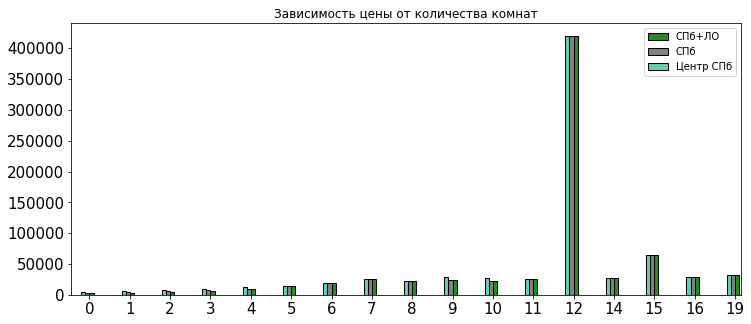

In [87]:
depend_price_multiple(['СПб+ЛО', 'СПб', 'Центр СПб'], 'rooms')

Как обычно, появились эти 12- и 15комнатные квартиры. Уберем все квартиры ненормальных размеров, оставим только те, в которых до 6 комнат, чтобы посмотреть на них более детально:

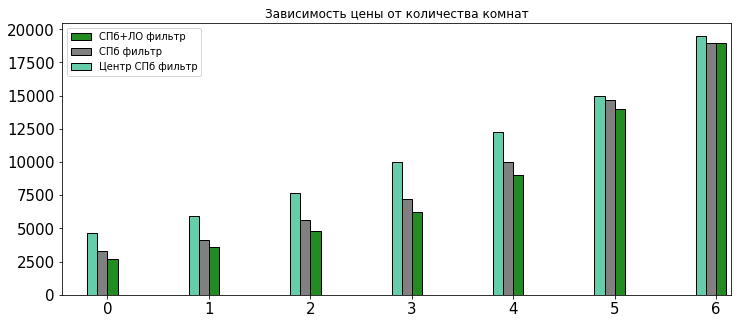

In [88]:
depend_price_multiple(['СПб+ЛО фильтр', 'СПб фильтр', 'Центр СПб фильтр'], 'rooms')

В среднем, картина одинаковая. С ростом количества комнат в квартире растёт и цена на неё. Но цены объективно выше всего в центре СПб, заметно ниже в пределах СПб, а в области дешевле, чем в городе. Всё ожидаемо. Но 5комнатные квартиры везде в цене.

Смотрим зависимость цены от этажа по всем данным, СПб и центру СПб

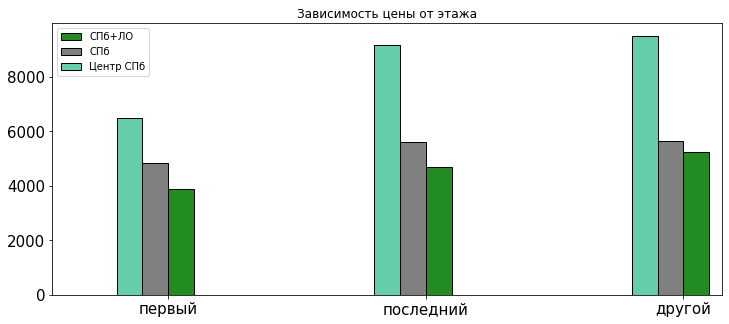

In [89]:
depend_price_multiple(['СПб+ЛО', 'СПб', 'Центр СПб'], 'level')

На первом этаже везде квартиры дешевле, чем на остальных этажах. Общий ценовой тренд, когда квартира дороже в центре СПб, чем в остальном СПб и области, ожидаемо сохраняется.

Смотрим зависимость цены от даты размещения объяления по всем данным, СПб и центру СПб.
Для этого необходимо изменить уже имеющуюся функцию dmy_price - создадим на её основе новую, чтобы получать графики сразу по всему датафрейму, по СПб и по его центру:

In [90]:
def dmy_price_multiple(list_of_dfs, ylims=None):
    dfs_dict = {'СПб+ЛО': aparts, 'СПб': aparts_spb, 'Центр СПб': aparts_in_center}
    dmy_to_plot = ['day', 'month', 'year']
    titles = ['Медиана цен по дню недели', 'Медиана цен по месяцу', 'Медиана цен по году']
    
    plt.style.use('seaborn-pastel')
    list_of_colors = ['forestgreen', 'grey', 'mediumaquamarine']
    legend_list = []
    
    for i in range(len(dmy_to_plot)):
        ax = plt.gca()
        plt.figure(figsize=(30,5))
        for df_number in range(len(list_of_dfs)):
            current_df = dfs_dict[list_of_dfs[df_number]]
            current_df_filtered = current_df.groupby(dmy_to_plot[i]).median()['last_price'].reset_index().sort_values(by=dmy_to_plot[i])
            if ylims is None:
                plot = current_df_filtered.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(15,5), ec='black',
                                               legend=False, title=titles[i], fontsize=15, color=list_of_colors[df_number],
                                               ax=ax, width=0.1, position=df_number)
            else:
                plot = current_df_filtered.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(15,5), ec='black',
                                               legend=False, title=titles[i], fontsize=15, color=list_of_colors[df_number],
                                               ax=ax, width=0.1, position=df_number, ylim=ylims[i])
            legend_list.append(list_of_dfs[df_number])
        x_axis = ax.xaxis
        x_axis.label.set_visible(False)
        ax.legend(legend_list, loc=1, framealpha=0.2)
        
    return plot

Получаем все данные:

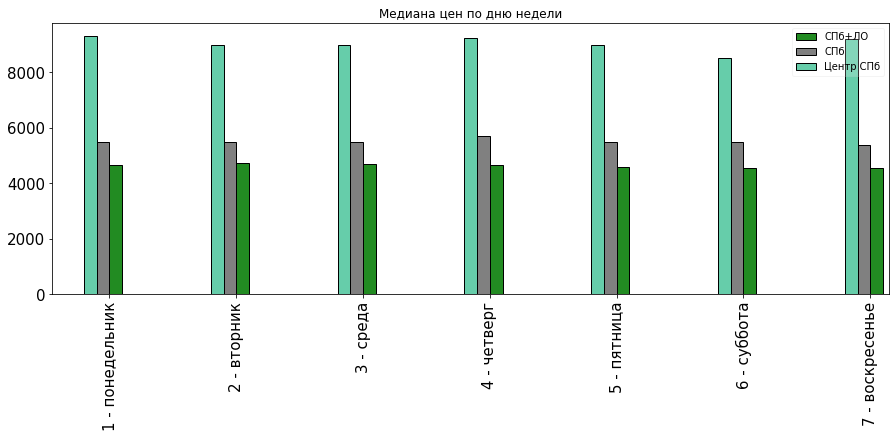

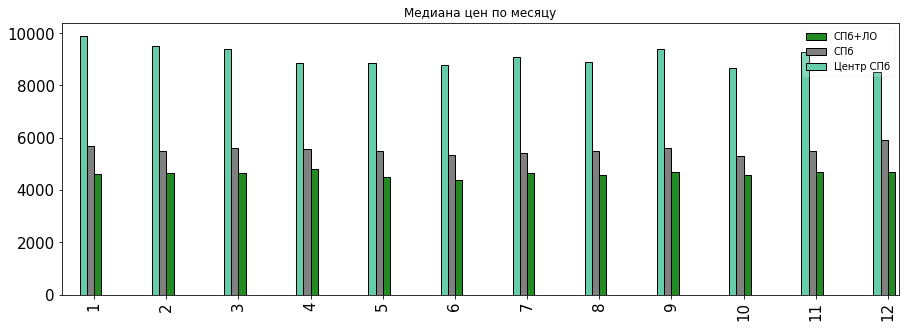

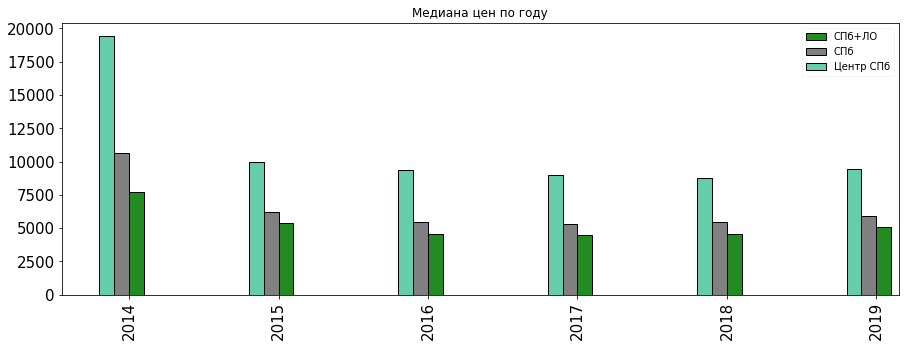

<Figure size 2160x360 with 0 Axes>

In [91]:
dmy_price_multiple(['СПб+ЛО', 'СПб', 'Центр СПб'])

<Figure size 2160x360 with 0 Axes>
Не очень понятно. Видно, что тенденции в среднем одни и те же что по квартир в центре СПб, что по квартирам в пределах СПб, что по всем квартирам датафрейма. Увеличим размеры каждого графика по вертикали и ограничим каждый график по оси Oy интервалом значений (4000, 6000) для дня недели и месяца и (4000, 12500) для года:

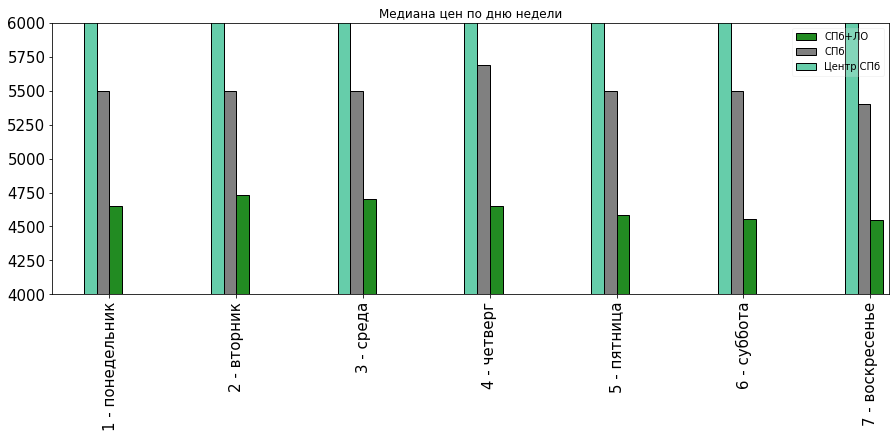

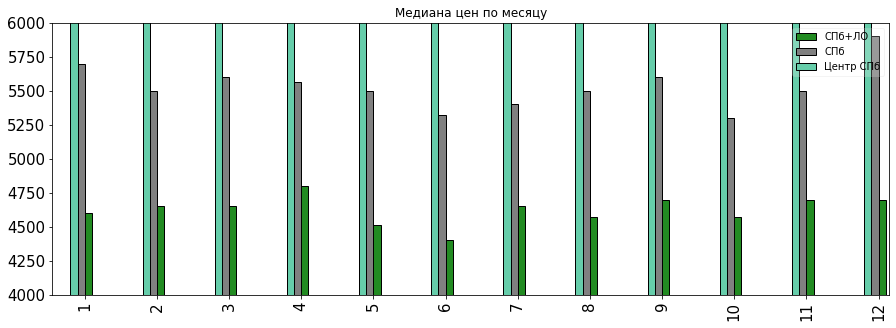

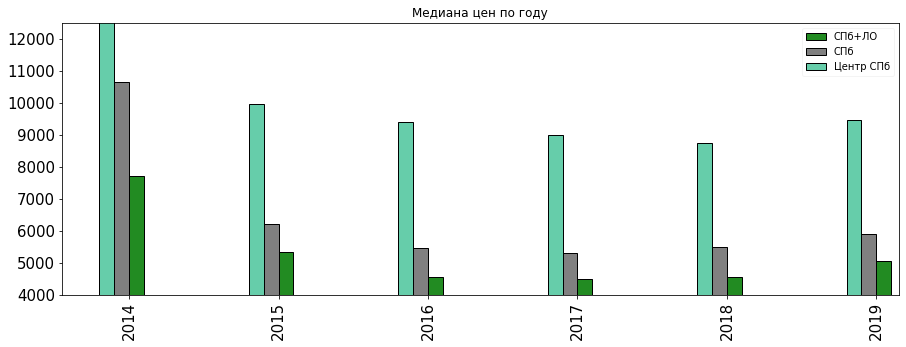

<Figure size 2160x360 with 0 Axes>

In [92]:
dmy_price_multiple(['СПб+ЛО', 'СПб', 'Центр СПб'], ylims=[(4000, 6000), (4000, 6000), (4000, 12500)])

По ценам по дню недели:
в среднем, квартиры, по которым объявления о продаже появились на рынке в будний день, продаются по незначительно более высокой цене, чем "выходные" квартиры. Такое утверждение справедливо для квартир в центре СПб и для квартир по всему СПб + ЛО, но не для квартир в пределах СПб;
по ценам по месяцу:
квартиры в СПб+ЛО и в пределах СПб, выставляемые на продажу летом, чуть дешевле остальных. Свою лепту вносят квартиры из ЛО, которые в 5 и 6 месяцах "прогибают" график. Видимо, спрос летом падает, т.к. многие в это время отдыхают, а люди не готовы продавать квартиры по полгода, поэтому снижают цены. Также для всех квартир справедливо утверждение, что они продаются дешевле по объявлению, сделанному в октябре;
По ценам по году:
для всех типов квартир 2014 стал последним годом высоких цен. Как кризис стал более прочно занимать позиции в России и в СНГ, так и цены поползли вниз, даже можно сказать, рухнули. В 2019г. общая тенденция такова, что цены на квартиры немного выросли по сравнению с периодом 2015-2018гг., сказывается то, что спрос становится всё больше и больше, так как граждане "освоились" в этой новой кризисной обстановке и научились распоряжяться своими средствами под действием этих факторов.

Воспользуемся функцией corr() и посмотрим, как влияют определенные параметры квартиры на её финальную цену.

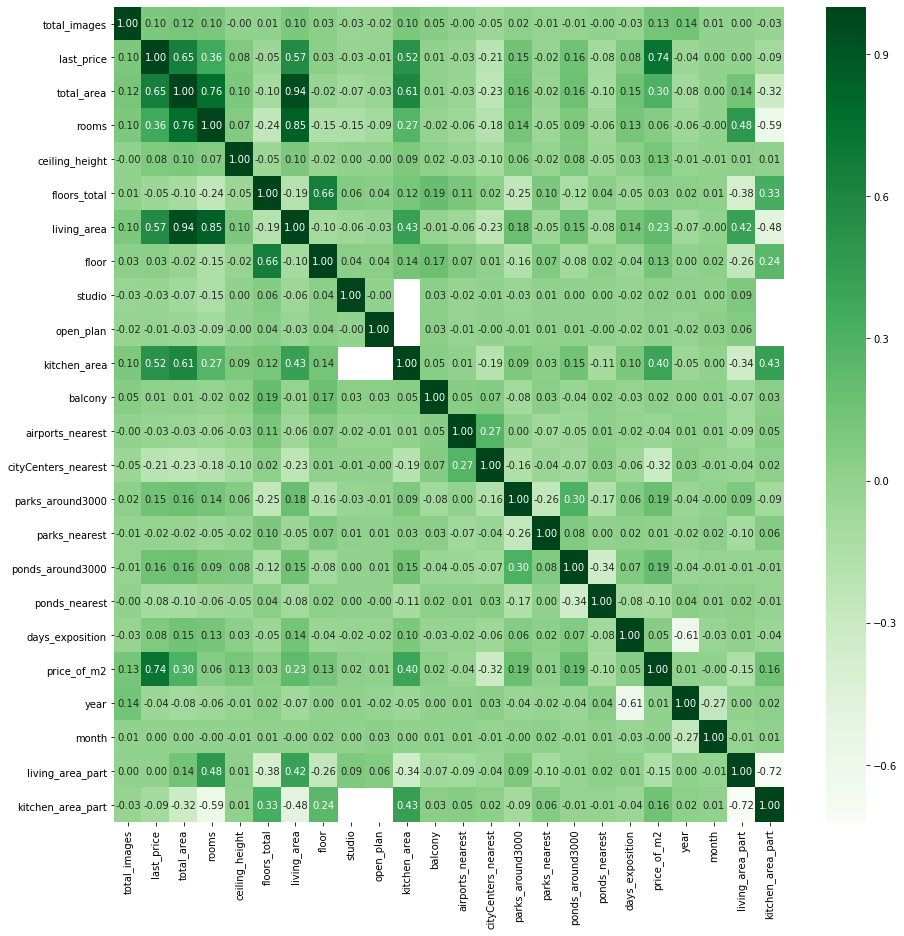

In [93]:
plt.figure(figsize=(15,15))
sns.heatmap(aparts.corr(), annot=True, cmap="Greens", fmt='.2f')

Выделим только столбец last_price, чтоб детальней рассмотреть влияние различных параметров именно на цену:

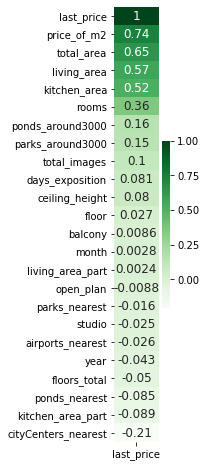

In [94]:
plt.figure(figsize=(1,8))
sns.heatmap(aparts.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':12})

Из данных выше, мы можем сказать, что сильнее всего цена на квартиру зависит от цены за квадратный метр (практически очевидно), от общей площади квартиры (чем больше площадь, тем выше цена), от площади жилой площади и площади кухни, а также от количества комнат. Небольшое влияние оказывает присутствие парков/водоемов рядом.
Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Ожидаемо. Таким же образом небольшое влияние оказывает удаленность от аэропорта.
Многие из этих параметров оказывают довольно слабое влияние, но если попробовать их объединить в одну группу, то, наверняка, можно будет построить хорошую предсказательную модель.

## Общий вывод

Сделаем выводы и на основе данных о корреляции, и на основе графиков.
Укажем факторы, которые сильнее всего влияют на конечную цену:

1. Метраж - Чем больше площадь квартиры, тем выше цена

2. Цена за квадратный метр - Чем больше цена за квадратный метр, тем выше цена

3. Доля жилой площади/кухни - Чем выше доля жилой площади/площадь кухни, тем выше цена

4. Количество комнат - Чем больше комнат, тем выше цена

Этаж - На первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных

Удаленность от центра - Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных.

День размещения объявления - Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.

Месяц размещения объявления - Квартиры, размещенные к продаже в летние месяцы и в октябре, в среднем дешевле, чем размещенные в любые другие месяца. В начале и в конце года цены стабильные и высокие.

Год размещения объявления - Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры (кризис). 2019г. - рецессия экономики - цены пошли вверх впервые после наступления кризиса.
